In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from pandas import DataFrame
import warnings
%matplotlib inline

In [2]:
if tf.test.gpu_device_name():
    print('Default GPU {}'.format(tf.test.gpu_device_name()))
else:    
    print('NO GPU DETECTED')
pd.options.mode.chained_assignment = None 

Default GPU /gpu:0


In [3]:
#print(len(data_loc))

apps = pd.read_csv('data_livelab/apps/apps', header=None, names=['id','application','genre','price'])




In [4]:
count = 0
name = {}
system_app_dic  = {}
for names in apps.application:
        #names = data0.application[i]      
        name[names] = count
        count += 1
        system_app_dic[names] = 0

In [120]:
data = pd.read_csv('data_livelab/apps/B09_apps', header=None, names=['id','device_id','application','time','duration'])

df = DataFrame(data)
data = df.sort_values(['time'], ascending=[True])


#data.insert(2, 'app', 0.0)
data.insert( 3, 'day', 0.0)
data.insert( 4, 'hour', 0.0)
data.insert(5, 'day_m', 0.0)
data.insert(6, 'month', 0.0)
data.insert(7, 'minutes', 0.0)
data.insert(8, 'sec', 0.0)
data.insert(9, 'system_app', 0.0)
data.insert(10, 'battery_level', 0.0)
data.insert(11, 'freq', 0.0)
data.insert(10, 'previous', 0.0)
#data.insert(8, 'battery_status', 0.0)
#data.insert(9, 'battery_temperature', 0.0)
#data.insert(10, 'battery_adaptor', 0.0)
#data.insert(10, 'battery_voltage', 0.0)
#data.insert(11, 'latitude', 0.0)
#data.insert(12, 'longitude', 0.0)
#data.insert(13, 'bearing', 0.0)
#data.insert(14, 'speed', 0.0)
#data.insert(15, 'altitude', 0.0)


data.head()

,id,device_id,application,day,hour,day_m,month,minutes,sec,system_app,previous,battery_level,freq,time,duration
119728,691894,21,com.apple.Preferences,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1266250760,10
707174,1279340,21,SpringBoard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1266250770,61
119729,691895,21,SpringBoard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1266259889,8
119730,691896,21,com.apple.MobileSMS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1266259897,1
707175,1279341,21,SpringBoard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1266259898,68


In [121]:
list1 = ['com.apple.mobilephone', 'SpringBoard', 'com.apple.Preferences']
#'com.apple.Preferences','com.apple.mobilecal','com.apple.mobileslideshow-Camera',
#count = 0
#cut = int(len(data) * 0.55)
for names in data.application:
        #names = data.application[i]      
        if names in list1:
            system_app_dic[names] =1
        else:
            system_app_dic[names] = 0

data.system_app = [system_app_dic[name] for name in data.application]  

In [122]:
system_app_dic

{'3on3publishing.MummysClub': 0,
 'com.288vroom.poeiphone': 0,
 'com.3ight.LoveQuotesiPhone': 0,
 'com.amazon.Lassen': 0,
 'com.appbooks.animalia': 0,
 'com.barnesandnoble.nook': 0,
 'com.bcnmultimedia.childrensbible': 0,
 'com.beamitdown.AliceInWonderland': 0,
 'com.beamitdown.GrimmTales': 0,
 'com.beamitdown.LovePoems': 0,
 'com.briskmobile.robotlite': 0,
 'com.chegg.mobile.consumer': 0,
 'com.classicsapp.classics': 0,
 'com.fivemobile.wattpad': 0,
 'com.fractalist.AdultJoke': 0,
 'com.google.GoogleBooks': 0,
 'com.iconology.Comics': 0,
 'com.iconology.scottpilgrim': 0,
 'com.ikidsplace.barneyTheDog': 0,
 'com.indianic.agnostic': 0,
 'com.inkstonesoftware.quickreaderlite': 0,
 'com.kiwitech.donquijote': 0,
 'com.kwonapps.FREEGhostStories': 0,
 'com.lexcycle.stanza': 0,
 'com.magnificat.magnificat': 0,
 'com.marvel.MarvelMobileComics': 0,
 'com.me.kjokeefe.StAugustine': 0,
 'com.menaragames.dccomic': 0,
 'com.mqdp.location.SexFacts500': 0,
 'com.mqdp.location.weirdfacts2': 0,
 'com.my

In [123]:
#data0 = data_[data_['application'] != 'MoC']
data0_ = data[data['system_app'] == 0]
#print(len(data0))
#data0_ = data

In [124]:
freq_ = 0
freq = {}

for names in data0_.application:
        #names = data0.application[i]      
        if names not in freq:
            freq[names] = 1
        else:
            freq[names] += 1
            
data0_.freq = [freq[name] for name in data0_.application]


In [125]:
data0 = data0_[data0_['freq'] > 0]

In [126]:
data0.head()

,id,device_id,application,day,hour,day_m,month,minutes,sec,system_app,previous,battery_level,freq,time,duration
119730,691896,21,com.apple.MobileSMS,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,6703,1266259897,1
119734,691900,21,com.apple.AppStore,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,148,1266261455,6
119737,691903,21,com.apple.AppStore,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,148,1266261501,162
119739,691905,21,com.apple.mobilesafari,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,343,1266261717,13
119741,691907,21,com.jirbo.MarbleMashLite,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,7,1266263068,188


In [127]:
date = data0.time 
#duration = data0.duration
week_dic = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday':7}

#duration = [dur for dur in duration if dur < 0 dur:0]
time_ = [datetime.datetime.fromtimestamp(int(d)) for d in date]
time = [str(times)[11:] for times in time_]
date_ = [str(times)[:11] for times in time_]
week_day = [datetime.datetime.strptime(str(day), '%Y-%M-%d ').strftime('%A') for day in date_]

month_ = [int(str(times)[5:7]) for times in time_]
day = [int(str(times)[8:10]) for times in time_]

time_int = [time_string.split(':') for time_string in time]
time_int_ = [int(''.join(time_scatter)) for time_scatter in time_int]

hour_int = [(int(hour[0]))/100  for hour in time_int]
min_int = [(int(hour[1]))/100  for hour in time_int]
sec_int = [(int(hour[2]))/100  for hour in time_int]

data0.month = month_
data0.day_m = day
data0.hour = hour_int
data0.minutes = min_int
data0.sec = sec_int


data0.day = [week_dic[day]/10 for day in week_day]

number_sessions = {}
time_by_app = {}
avg_app_time = {}
data0.date = date_


new_ids = {}
new_id = 1

for names in data0.application:
        #names = data0.application[i]      
        
        if names not in new_ids:
            new_ids[names] = new_id
            new_id +=1
       
        if names not in number_sessions:
            number_sessions[names] = 1
            #time_by_app[names] = duration[i]
        else:
            number_sessions[names] += 1
            #time_by_app[names] += duration[i]
#data0.id = [for i in data0.application if new_ids[i] == 'SpringBoard']
data0.id = [new_ids[i] for i in data0.application]  
#n = 0
#data0.id = [n for id_ in data0.id if id_ == 1]
avg = [float(time_by_app[i])/float(number_sessions[i]) for i in time_by_app]  
j = 0
n_classes = new_id - 1

#number_apps = len(data)    
    
data0.head()

,id,device_id,application,day,hour,day_m,month,minutes,sec,system_app,previous,battery_level,freq,time,duration
119730,1,21,com.apple.MobileSMS,0.7,0.03,16,2,0.51,0.37,0,0.0,0.0,6703,1266259897,1
119734,2,21,com.apple.AppStore,0.7,0.04,16,2,0.17,0.35,0,0.0,0.0,148,1266261455,6
119737,2,21,com.apple.AppStore,0.7,0.04,16,2,0.18,0.21,0,0.0,0.0,148,1266261501,162
119739,3,21,com.apple.mobilesafari,0.7,0.04,16,2,0.21,0.57,0,0.0,0.0,343,1266261717,13
119741,4,21,com.jirbo.MarbleMashLite,0.7,0.04,16,2,0.44,0.28,0,0.0,0.0,7,1266263068,188


In [128]:
#data0.sec
data0.tail()

,id,device_id,application,day,hour,day_m,month,minutes,sec,system_app,previous,battery_level,freq,time,duration
141914,14,21,com.apple.mobileipod-MediaPlayer,0.7,0.10,22,3,0.49,0.58,0,0.0,0.0,2404,1300758598,3
141916,20,21,com.apple.mobiletimer,0.1,0.18,23,3,0.26,0.12,0,0.0,0.0,615,1300872372,16
141918,14,21,com.apple.mobileipod-MediaPlayer,0.1,0.23,23,3,0.30,0.43,0,0.0,0.0,2404,1300890643,2
141920,20,21,com.apple.mobiletimer,0.1,0.23,23,3,0.30,0.48,0,0.0,0.0,615,1300890648,11
141921,20,21,com.apple.mobiletimer,0.2,0.02,24,3,0.30,0.48,0,0.0,0.0,615,1300901448,2


In [129]:
all_ids = np.zeros([len(data0)])
ids_dic = [ids for ids in data0.id]

i = 0
for i in range(len(all_ids)):    
    if i != 0:
        all_ids[i] = ids_dic[i - 1]
data0.previous = [int(ids) for ids in all_ids]
data0.head()

,id,device_id,application,day,hour,day_m,month,minutes,sec,system_app,previous,battery_level,freq,time,duration
119730,1,21,com.apple.MobileSMS,0.7,0.03,16,2,0.51,0.37,0,0,0.0,6703,1266259897,1
119734,2,21,com.apple.AppStore,0.7,0.04,16,2,0.17,0.35,0,1,0.0,148,1266261455,6
119737,2,21,com.apple.AppStore,0.7,0.04,16,2,0.18,0.21,0,2,0.0,148,1266261501,162
119739,3,21,com.apple.mobilesafari,0.7,0.04,16,2,0.21,0.57,0,2,0.0,343,1266261717,13
119741,4,21,com.jirbo.MarbleMashLite,0.7,0.04,16,2,0.44,0.28,0,3,0.0,7,1266263068,188


In [130]:
print(freq)


{'com.apple.MobileSMS': 6703, 'com.apple.AppStore': 148, 'com.apple.mobilesafari': 343, 'com.jirbo.MarbleMashLite': 7, 'com.apple.MobileAddressBook': 104, 'com.apple.MobileStore': 21, 'com.apple.mobilemail': 341, 'com.apple.youtube': 87, 'com.apple.calculator': 77, 'com.apple.compass': 33, 'com.appventions.batteryboost': 1, 'Colosseum': 11, 'com.cazualgamez.RedBall': 17, 'com.apple.mobileipod-MediaPlayer': 2404, 'com.facebook.Facebook': 2400, 'com.apple.mobilenotes': 53, 'com.apple.mobilecal': 54, 'com.stylem.Backgrounds': 18, 'com.apple.mobileslideshow-Camera': 93, 'com.apple.mobiletimer': 615, 'com.apple.stocks': 53, 'com.apple.weather': 57, 'com.cobra.BombaAway': 6, 'com.apple.VoiceMemos': 21, 'com.pandora': 121, 'com.xcubelabs.MusicnLyrics': 5, 'com.appsilicious.backgroundwallpapers': 10, 'com.tapjoy.tapout': 14, 'com.gamefly.gamecenter': 51, 'com.ihandysoft.alarmclock': 34, 'com.jeffreygrossman.moviesapp': 6, 'com.apple.mobileslideshow-Photos': 103, 'com.redbox.m': 1, 'com.pointyh

In [131]:
print(len(data0))
system = {'com.apple.mobilephone','com.apple.Preferences','com.apple.mobilecal','com.apple.mobileslideshow-Camera'} 

14612


In [133]:
battery_data = pd.read_csv('data_livelab/power/B09_power', header=None, names=['id','device_id','time','power','mah','current', 'charging', 'charged'])
#battery_data.time = [float(time)/10e12 for time in battery_data.time]
#battery_data.battery_level = [bat/100 for bat in battery_data.battery_level]
#battery_data.battery_temperature = [bat/100 for bat in battery_data.battery_temperature]
#battery_data.battery_adaptor = [ad/10 for ad in battery_data.battery_adaptor]
#battery_data.battery_status = [stat/10 for stat in battery_data.battery_status]
#battery_data.device_id = [dev/10 for dev in battery_data.device_id]

In [134]:
#df = DataFrame(battery_data)
#battery_data = df.sort_values(['time'], ascending=[True])

battery_data.head()

,id,device_id,time,power,mah,current,charging,charged
9035579,9035580,21,1266249389,97,4109,-170,0,0
9035580,9035581,21,1266249409,97,4121,-89,0,0
9035581,9035582,21,1266249430,97,4122,-61,0,0
9035582,9035583,21,1266249450,97,4125,-32,0,0
9035583,9035584,21,1266250759,97,4125,-32,0,0


In [135]:
location_data = pd.read_csv('data_livelab/accel/B09_accel2', header=None, names=['id','time','x', 'y', 'z'])

#df = DataFrame(location_data)
#location_data = df.sort_values(['time'], ascending=[True])



#location_data.time = [time/10e12 for time in location_data.time]
#location_data.latitude = [lat/100 for lat in location_data.latitude]
#location_data.longitude = [lon/100 for lon in location_data.longitude]
#location_data.bearing = [bea/10e2 for bea in location_data.bearing]
#location_data.speed = [speed/10 for speed in location_data.speed]
#location_data.altitude = [alt/10e2 for alt in location_data.altitude]
#location_data.device_id = [loc/10 for loc in location_data.device_id]

In [136]:
location_data.head()

,id,time,x,y,z
29401910,6,1266249378,0.018112,-0.054337,-1.014282
29401911,6,1266249378,0.018112,-0.054337,-0.996170
29401912,6,1266249378,0.018112,-0.054337,-1.014282
29401913,6,1266249378,0.018112,-0.054337,-1.014282
29401914,6,1266249378,0.018112,-0.054337,-0.996170


In [137]:
wifi = pd.read_csv('data_livelab/wifi/B09_wifi', header=None, names=['id','time','ssid','bssid','channel','rate','rssi'])
wifi.rate = [rate/100 for rate in wifi.rate]
wifi.rssi = [rssi/100 for rssi in wifi.rssi]

In [138]:
wifi.head()

,id,time,ssid,bssid,channel,rate,rssi
33315950,23,2010-10-12 23:06:36,61480f2dd8b2ea4283ea321f915310b9,822362f778ca6ddb2e25fd7d271bc4ba,1,0.54,-0.68
33315951,23,2010-10-12 23:06:38,61480f2dd8b2ea4283ea321f915310b9,822362f778ca6ddb2e25fd7d271bc4ba,1,0.54,-0.68
33315952,23,2010-10-12 23:06:41,61480f2dd8b2ea4283ea321f915310b9,822362f778ca6ddb2e25fd7d271bc4ba,1,0.54,-0.68
33315953,23,2010-10-12 23:06:43,61480f2dd8b2ea4283ea321f915310b9,822362f778ca6ddb2e25fd7d271bc4ba,1,0.36,-0.77
33315954,23,2010-10-12 23:06:45,61480f2dd8b2ea4283ea321f915310b9,822362f778ca6ddb2e25fd7d271bc4ba,1,0.36,-0.77


In [139]:
#data0.time = [time/10e12 for time in data0.time]
    
    

In [140]:
#data0.head()

In [141]:
#data0.insert('')
data0.insert(5, 'charging', 0.0)


In [142]:
data0.insert(6, 'charged', 0.0)
data0.insert(7, 'x', 0.0)
data0.insert(8, 'y', 0.0)
data0.insert(9, 'z', 0.0)
data0.insert(10, 'channel', 0.0)
data0.insert(8, 'rate', 0.0)
data0.insert(9, 'rssi', 0.0)



data0.tail()

,id,device_id,application,day,hour,charging,charged,x,rate,rssi,...,day_m,month,minutes,sec,system_app,previous,battery_level,freq,time,duration
141914,14,21,com.apple.mobileipod-MediaPlayer,0.7,0.10,0.0,0.0,0.0,0.0,0.0,...,22,3,0.49,0.58,0,14,0.0,2404,1300758598,3
141916,20,21,com.apple.mobiletimer,0.1,0.18,0.0,0.0,0.0,0.0,0.0,...,23,3,0.26,0.12,0,14,0.0,615,1300872372,16
141918,14,21,com.apple.mobileipod-MediaPlayer,0.1,0.23,0.0,0.0,0.0,0.0,0.0,...,23,3,0.30,0.43,0,20,0.0,2404,1300890643,2
141920,20,21,com.apple.mobiletimer,0.1,0.23,0.0,0.0,0.0,0.0,0.0,...,23,3,0.30,0.48,0,14,0.0,615,1300890648,11
141921,20,21,com.apple.mobiletimer,0.2,0.02,0.0,0.0,0.0,0.0,0.0,...,24,3,0.30,0.48,0,20,0.0,615,1300901448,2


In [143]:
data0.head()

,id,device_id,application,day,hour,charging,charged,x,rate,rssi,...,day_m,month,minutes,sec,system_app,previous,battery_level,freq,time,duration
119730,1,21,com.apple.MobileSMS,0.7,0.03,0.0,0.0,0.0,0.0,0.0,...,16,2,0.51,0.37,0,0,0.0,6703,1266259897,1
119734,2,21,com.apple.AppStore,0.7,0.04,0.0,0.0,0.0,0.0,0.0,...,16,2,0.17,0.35,0,1,0.0,148,1266261455,6
119737,2,21,com.apple.AppStore,0.7,0.04,0.0,0.0,0.0,0.0,0.0,...,16,2,0.18,0.21,0,2,0.0,148,1266261501,162
119739,3,21,com.apple.mobilesafari,0.7,0.04,0.0,0.0,0.0,0.0,0.0,...,16,2,0.21,0.57,0,2,0.0,343,1266261717,13
119741,4,21,com.jirbo.MarbleMashLite,0.7,0.04,0.0,0.0,0.0,0.0,0.0,...,16,2,0.44,0.28,0,3,0.0,7,1266263068,188


In [144]:
wifi.tail()

,id,time,ssid,bssid,channel,rate,rssi
35478141,23,2011-03-24 09:27:47,61480f2dd8b2ea4283ea321f915310b9,a2df6eca4603b40936a3d2bc1414ca08,11,0.54,-0.59
35478142,23,2011-03-24 09:32:39,61480f2dd8b2ea4283ea321f915310b9,a2df6eca4603b40936a3d2bc1414ca08,11,0.54,-0.58
35478143,23,2011-03-24 09:32:41,61480f2dd8b2ea4283ea321f915310b9,a2df6eca4603b40936a3d2bc1414ca08,11,0.54,-0.58
35478144,23,2011-03-24 09:32:44,61480f2dd8b2ea4283ea321f915310b9,a2df6eca4603b40936a3d2bc1414ca08,11,0.54,-0.58
35478145,23,2011-03-24 09:32:46,61480f2dd8b2ea4283ea321f915310b9,a2df6eca4603b40936a3d2bc1414ca08,11,0.54,-0.58


In [145]:
#data0_ = data0[data0['id'] > 1]
data0_ = data0
print(len(data0_))

14612


In [146]:
data0_.head()

,id,device_id,application,day,hour,charging,charged,x,rate,rssi,...,day_m,month,minutes,sec,system_app,previous,battery_level,freq,time,duration
119730,1,21,com.apple.MobileSMS,0.7,0.03,0.0,0.0,0.0,0.0,0.0,...,16,2,0.51,0.37,0,0,0.0,6703,1266259897,1
119734,2,21,com.apple.AppStore,0.7,0.04,0.0,0.0,0.0,0.0,0.0,...,16,2,0.17,0.35,0,1,0.0,148,1266261455,6
119737,2,21,com.apple.AppStore,0.7,0.04,0.0,0.0,0.0,0.0,0.0,...,16,2,0.18,0.21,0,2,0.0,148,1266261501,162
119739,3,21,com.apple.mobilesafari,0.7,0.04,0.0,0.0,0.0,0.0,0.0,...,16,2,0.21,0.57,0,2,0.0,343,1266261717,13
119741,4,21,com.jirbo.MarbleMashLite,0.7,0.04,0.0,0.0,0.0,0.0,0.0,...,16,2,0.44,0.28,0,3,0.0,7,1266263068,188


# Getting Battery Level

In [147]:
app_data = data0_[['time', 'day', 'hour', 'minutes','day_m','month','battery_level', 'charging', 'charged', 'x', 'y', 'z', 'rate', 'rssi', 'channel', 'freq', 'id', 'previous', 'duration' ]].values
power_data = battery_data[['time', 'power','charging', 'charged']].values
location = location_data[['time','x', 'y', 'z']].values
data_wi = wifi[['time', 'channel', 'rate', 'rssi']].values

In [148]:
app_data[0, 0] - location[0, 0]

10519.0

In [149]:

length=len(app_data)
length_ = len(power_data)
start = 0
delay = 180 # tolerance 

for i in range(length):
    app_time = app_data[i, 0]
    for k in range(start, length_, 1):
        power_time = power_data[k, 0]
        if app_time <= power_time + delay:
            app_data[i, 6:9] = power_data[k, 1:]
            break
        else:
            start += 1 

In [150]:
print(len(power_data), start)

370294 369799


In [151]:
m = 0
start = 0
for k in range(start, len(location), 1):
    if app_data[0, 0] <= location[k, 0] + 7200:
        m = k
        break
m, len(location)

(374, 4230483)

In [152]:
len(location), length, app_data[0,0] - location[0, 0]

(4230483, 14612, 10519.0)

In [153]:
start = 0
length_loc = len(location)
delay_loc = 899

for i in range(length):
    app_time = app_data[i, 0]
    for k in range(start, length_loc, 1):
        location_time = location[k, 0]
        if app_time <= (location_time + delay_loc):
            app_data[i, 9:12] = location[k, 1:]
            break
        else:
            start += 1
            

In [154]:
#wifi.time = [((datetime.datetime.strptime(time_, '%Y-%m-%d %H:%M:%S')).timestamp) for time_ in wifi.time]
print(start, len(location))

4226987 4230483


In [155]:
wifi.tail()

,id,time,ssid,bssid,channel,rate,rssi
35478141,23,2011-03-24 09:27:47,61480f2dd8b2ea4283ea321f915310b9,a2df6eca4603b40936a3d2bc1414ca08,11,0.54,-0.59
35478142,23,2011-03-24 09:32:39,61480f2dd8b2ea4283ea321f915310b9,a2df6eca4603b40936a3d2bc1414ca08,11,0.54,-0.58
35478143,23,2011-03-24 09:32:41,61480f2dd8b2ea4283ea321f915310b9,a2df6eca4603b40936a3d2bc1414ca08,11,0.54,-0.58
35478144,23,2011-03-24 09:32:44,61480f2dd8b2ea4283ea321f915310b9,a2df6eca4603b40936a3d2bc1414ca08,11,0.54,-0.58
35478145,23,2011-03-24 09:32:46,61480f2dd8b2ea4283ea321f915310b9,a2df6eca4603b40936a3d2bc1414ca08,11,0.54,-0.58


In [156]:
wifi.head()

,id,time,ssid,bssid,channel,rate,rssi
33315950,23,2010-10-12 23:06:36,61480f2dd8b2ea4283ea321f915310b9,822362f778ca6ddb2e25fd7d271bc4ba,1,0.54,-0.68
33315951,23,2010-10-12 23:06:38,61480f2dd8b2ea4283ea321f915310b9,822362f778ca6ddb2e25fd7d271bc4ba,1,0.54,-0.68
33315952,23,2010-10-12 23:06:41,61480f2dd8b2ea4283ea321f915310b9,822362f778ca6ddb2e25fd7d271bc4ba,1,0.54,-0.68
33315953,23,2010-10-12 23:06:43,61480f2dd8b2ea4283ea321f915310b9,822362f778ca6ddb2e25fd7d271bc4ba,1,0.36,-0.77
33315954,23,2010-10-12 23:06:45,61480f2dd8b2ea4283ea321f915310b9,822362f778ca6ddb2e25fd7d271bc4ba,1,0.36,-0.77


In [157]:
len(wifi), len(location), len(app_data)

(2162196, 4230483, 14612)

In [158]:
start = 0
len_wifi = len(data_wi)
delay_wifi = 180
for i in range(length):   
    app_time = app_data[i, 0]
    for k in range(start, len_wifi, 1):
        date_time = str(data_wi[k, 0])
        str_time = datetime.datetime.strptime(date_time, '%Y-%m-%d %H:%M:%S')
        wifi_time = int(str_time.timestamp())
        if app_time <= wifi_time + delay_wifi :
            app_data[i, 12:15] = data_wi[k, 1:] 
            break           
        else:
            start += 1
            

In [159]:

start, len_wifi


(2160619, 2162196)

In [160]:
app_data[:1]

array([[  1.26625990e+09,   7.00000000e-01,   3.00000000e-02,
          5.10000000e-01,   1.60000000e+01,   2.00000000e+00,
          9.60000000e+01,   0.00000000e+00,   0.00000000e+00,
          3.26019000e-01,  -2.53571000e-01,  -8.51273000e-01,
          1.00000000e+00,   5.40000000e-01,  -6.80000000e-01,
          6.70300000e+03,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

In [161]:
np.savetxt('ricelivelab.txt', app_data, delimiter=',')  
#app_data.to_csv('xgboost.txt', header=True, index=False, sep='\t', mode='a')

In [162]:
livelab_data = pd.read_csv('ricelivelab.txt', header=None, names=['time','day', 'hour','minutes', 'month', 'day_m','battery_level', 'charging', 'charged', 'x', 'y', 'z', 'rssi', 'channel', 'rate', 'freq', 'id', 'previous', 'duration'])
livelab_data.battery_level = [lev/100 for lev in livelab_data.battery_level]
livelab_data.head()

,time,day,hour,minutes,month,day_m,battery_level,charging,charged,x,y,z,rssi,channel,rate,freq,id,previous,duration
0,1.266260e+09,0.7,0.03,0.51,16.0,2.0,0.96,0.0,0.0,0.326019,-0.253571,-0.851273,1.0,0.54,-0.68,6703.0,1.0,0.0,1.0
1,1.266261e+09,0.7,0.04,0.17,16.0,2.0,0.95,0.0,0.0,0.326019,-0.253571,-0.851273,1.0,0.54,-0.68,148.0,2.0,1.0,6.0
2,1.266262e+09,0.7,0.04,0.18,16.0,2.0,0.95,0.0,0.0,0.326019,-0.253571,-0.851273,1.0,0.54,-0.68,148.0,2.0,2.0,162.0
3,1.266262e+09,0.7,0.04,0.21,16.0,2.0,0.94,0.0,0.0,0.326019,-0.253571,-0.851273,1.0,0.54,-0.68,343.0,3.0,2.0,13.0
4,1.266263e+09,0.7,0.04,0.44,16.0,2.0,0.93,0.0,0.0,0.362244,-0.307907,-0.887497,1.0,0.54,-0.68,7.0,4.0,3.0,188.0


In [163]:
livelab_data.tail()

,time,day,hour,minutes,month,day_m,battery_level,charging,charged,x,y,z,rssi,channel,rate,freq,id,previous,duration
14607,1.300759e+09,0.7,0.10,0.49,22.0,3.0,0.29,0.0,0.0,-0.996170,0.543365,0.398468,11.0,0.54,-0.56,2404.0,14.0,14.0,3.0
14608,1.300872e+09,0.1,0.18,0.26,23.0,3.0,0.96,1.0,0.0,0.000000,0.000000,-0.996170,11.0,0.54,-0.52,615.0,20.0,14.0,16.0
14609,1.300891e+09,0.1,0.23,0.30,23.0,3.0,0.83,0.0,0.0,-0.018112,-0.018112,-1.014282,11.0,0.54,-0.50,2404.0,14.0,20.0,2.0
14610,1.300891e+09,0.1,0.23,0.30,23.0,3.0,0.83,0.0,0.0,-0.018112,-0.018112,-1.014282,11.0,0.54,-0.50,615.0,20.0,14.0,11.0
14611,1.300901e+09,0.2,0.02,0.30,24.0,3.0,0.76,0.0,0.0,-0.018112,-0.018112,-0.996170,11.0,0.54,-0.56,615.0,20.0,20.0,2.0


In [48]:


def concat_inputs(time, day, minutes, month, day_m, battery_level, charging, charged, x, y, z, rssi, channel, rate, freq, id_, previous, duration):
    list_ = []
    list_.insert(0)


length = len(livelab_data)
sequence = []
list_seq = []
seq_seq = []
prev_id = 0
user_id = 0
append = 0
max_seq = 0
seq = 0
list_index = 0
spam = 0
duration = 0

for i in range(length):
    duration = livelab_data.duration[i]
    time = livelab_data.time[i]
    id_ = livelab_data.id[i]
    
    sequence.insert(0, livelab_data.day[i])
    sequence.insert(1, livelab_data.hour[i])
    sequence.insert(2, livelab_data.minutes[i])
    sequence.insert(3, livelab_data.month[i])
    sequence.insert(4, livelab_data.day_m[i])
    sequence.insert(5, livelab_data.battery_level[i])
    sequence.insert(6, livelab_data.x[i])
    sequence.insert(7, livelab_data.y[i])
    sequence.insert(8, livelab_data.z[i])
    
    if (i == 0) or (time - 30 <= spam):
        append += 1
        list_seq.append([append, sequence])
        sequence = []
        
        seq += 1
    else:
        spam = 0
        seq_seq.append([list_index, list_seq])
        list_seq = []
        append = 1
        list_seq.append([append, sequence])
        sequence = []
        
        
        if seq > max_seq:
            max_seq = seq
        seq = 1
        list_index +=1    
        
    spam = duration + time

In [3523]:
seq_seq

[[0,
  [[1,
    [0.69999999999999996,
     0.16,
     0.40000000000000002,
     16.0,
     2.0,
     0.57999999999999996,
     0.235458,
     -0.54336499999999999,
     -0.85127299999999995]]]],
 [1,
  [[1,
    [0.69999999999999996,
     0.16,
     0.40999999999999998,
     16.0,
     2.0,
     0.57999999999999996,
     0.235458,
     -0.54336499999999999,
     -0.85127299999999995]],
   [2,
    [0.69999999999999996,
     0.16,
     0.42999999999999999,
     16.0,
     2.0,
     0.57999999999999996,
     0.235458,
     -0.54336499999999999,
     -0.85127299999999995]]]],
 [2,
  [[1,
    [0.69999999999999996,
     0.16,
     0.45000000000000001,
     16.0,
     2.0,
     0.57999999999999996,
     0.235458,
     -0.54336499999999999,
     -0.85127299999999995]],
   [2,
    [0.69999999999999996,
     0.16,
     0.45000000000000001,
     16.0,
     2.0,
     0.56999999999999995,
     0.235458,
     -0.54336499999999999,
     -0.85127299999999995]],
   [3,
    [0.69999999999999996,
     0.1

In [3524]:
list_index

4953

In [3525]:
time_series = np.zeros([list_index, max_seq + 1])

In [3526]:
for i, item in enumerate(seq_seq):
    for j, k in enumerate(item):
        print (k)

0
[[1, [0.69999999999999996, 0.16, 0.40000000000000002, 16.0, 2.0, 0.57999999999999996, 0.235458, -0.54336499999999999, -0.85127299999999995]]]
1
[[1, [0.69999999999999996, 0.16, 0.40999999999999998, 16.0, 2.0, 0.57999999999999996, 0.235458, -0.54336499999999999, -0.85127299999999995]], [2, [0.69999999999999996, 0.16, 0.42999999999999999, 16.0, 2.0, 0.57999999999999996, 0.235458, -0.54336499999999999, -0.85127299999999995]]]
2
[[1, [0.69999999999999996, 0.16, 0.45000000000000001, 16.0, 2.0, 0.57999999999999996, 0.235458, -0.54336499999999999, -0.85127299999999995]], [2, [0.69999999999999996, 0.16, 0.45000000000000001, 16.0, 2.0, 0.56999999999999995, 0.235458, -0.54336499999999999, -0.85127299999999995]], [3, [0.69999999999999996, 0.16, 0.46000000000000002, 16.0, 2.0, 0.56999999999999995, 0.235458, -0.54336499999999999, -0.85127299999999995]], [4, [0.69999999999999996, 0.16, 0.46999999999999997, 16.0, 2.0, 0.56999999999999995, 0.235458, -0.54336499999999999, -0.85127299999999995]]]
3
[[

1439
[[1, [0.10000000000000001, 0.12, 0.20000000000000001, 10.0, 9.0, 0.39000000000000001, -0.10867300000000001, -0.70637499999999998, -0.47091699999999997]]]
1440
[[1, [0.10000000000000001, 0.12, 0.28000000000000003, 10.0, 9.0, 0.38, -0.10867300000000001, -0.70637499999999998, -0.47091699999999997]], [2, [0.10000000000000001, 0.12, 0.34999999999999998, 10.0, 9.0, 0.34000000000000002, -0.10867300000000001, -0.70637499999999998, -0.47091699999999997]]]
1441
[[1, [0.10000000000000001, 0.14000000000000001, 0.58999999999999997, 10.0, 9.0, 0.73999999999999999, -0.036223999999999999, 0.036223999999999999, -1.0867309999999999]]]
1442
[[1, [0.10000000000000001, 0.23000000000000001, 0.54000000000000004, 10.0, 9.0, 1.0, -0.036223999999999999, 0.0, -1.0867309999999999]], [2, [0.10000000000000001, 0.23000000000000001, 0.55000000000000004, 10.0, 9.0, 1.0, -0.036223999999999999, 0.0, -1.0867309999999999]]]
1443
[[1, [0.20000000000000001, 0.0, 0.56000000000000005, 11.0, 9.0, 0.94999999999999996, -0.0

[[1, [0.69999999999999996, 0.17999999999999999, 0.19, 2.0, 12.0, 0.40999999999999998, 0.77882399999999985, -0.25357099999999999, -0.63392599999999999]]]
3331
[[1, [0.69999999999999996, 0.17999999999999999, 0.31, 2.0, 12.0, 0.35999999999999999, 0.77882399999999985, -0.25357099999999999, -0.63392599999999999]]]
3332
[[1, [0.69999999999999996, 0.17999999999999999, 0.38, 2.0, 12.0, 0.39000000000000001, -0.018112, -0.018112, -1.0867309999999999]]]
3333
[[1, [0.69999999999999996, 0.17999999999999999, 0.46999999999999997, 2.0, 12.0, 0.42999999999999999, -0.018112, -0.018112, -1.0867309999999999]], [2, [0.69999999999999996, 0.17999999999999999, 0.47999999999999998, 2.0, 12.0, 0.42999999999999999, -0.018112, -0.018112, -1.0867309999999999]]]
3334
[[1, [0.69999999999999996, 0.22, 0.44, 2.0, 12.0, 1.0, -0.018112, 0.0, -1.0867309999999999]]]
3335
[[1, [0.10000000000000001, 0.0, 0.10000000000000001, 3.0, 12.0, 1.0, -0.036223999999999999, -0.018112, -1.0867309999999999]]]
3336
[[1, [0.10000000000000

In [ ]:
time	day	hour	minutes	month	day_m	battery_level	charging	charged	x	y	z

In [397]:
from scipy import stats

In [410]:
N_TIME_STEPS = 15
features = 5
segments = []
step = 20
labels = []
count = 0

for i in range(0, len(livelab_data) - N_TIME_STEPS, step):
    bat = livelab_data['battery_level'].values[i: i + N_TIME_STEPS]
    day = livelab_data['day'].values[i: i + N_TIME_STEPS]
    hour = livelab_data['hour'].values[i: i + N_TIME_STEPS]
    x = livelab_data['x'].values[i: i + N_TIME_STEPS]
    y = livelab_data['y'].values[i: i + N_TIME_STEPS]
    
    label = (livelab_data['id'].values[i: i + N_TIME_STEPS])
    segments.append([bat, day, hour, x, y])
    labels.append([label])

seg_array = np.asarray(segments)
labels_array = np.asarray(labels)
seg_array.shape
#labels_array.shape

(536, 5, 15)

In [411]:
len(livelab_data)

10726

In [412]:
seg_reshape = np.reshape(seg_array, (-1, N_TIME_STEPS, features))
seg_reshape.shape

(536, 15, 5)

In [414]:
labels_array

array([[[  1.,   2.,   3., ...,   2.,   9.,   4.]],

       [[  2.,   5.,   3., ...,  15.,  16.,   6.]],

       [[ 17.,   9.,  12., ...,  10.,   1.,   6.]],

       ..., 
       [[  1.,   1.,   1., ...,   3.,   3.,   3.]],

       [[  1.,   1.,   1., ...,   4.,   4.,   1.]],

       [[  1.,   1.,  49., ...,   4.,   4.,   4.]]])

In [415]:
labels_reshaped = np.reshape(labels_array, (-1, N_TIME_STEPS, 1 ))

In [416]:
#labels_dumies = np.asarray(pd.get_dummies(labels))

In [164]:
livelab_data_ = livelab_data[livelab_data['freq'] > 0]
#data_label = data_label[data_label['freq'] > 80]

In [165]:
ids = {}
id_data = 1
count = 0

for id_ in livelab_data_.id:
    if id_ not in ids:
        ids[id_] = id_data
        id_data += 1
livelab_data_.id = [ids[id_] for id_ in livelab_data_.id]


In [166]:
livelab_data_.head()

,time,day,hour,minutes,month,day_m,battery_level,charging,charged,x,y,z,rssi,channel,rate,freq,id,previous,duration
0,1.266260e+09,0.7,0.03,0.51,16.0,2.0,0.96,0.0,0.0,0.326019,-0.253571,-0.851273,1.0,0.54,-0.68,6703.0,1,0.0,1.0
1,1.266261e+09,0.7,0.04,0.17,16.0,2.0,0.95,0.0,0.0,0.326019,-0.253571,-0.851273,1.0,0.54,-0.68,148.0,2,1.0,6.0
2,1.266262e+09,0.7,0.04,0.18,16.0,2.0,0.95,0.0,0.0,0.326019,-0.253571,-0.851273,1.0,0.54,-0.68,148.0,2,2.0,162.0
3,1.266262e+09,0.7,0.04,0.21,16.0,2.0,0.94,0.0,0.0,0.326019,-0.253571,-0.851273,1.0,0.54,-0.68,343.0,3,2.0,13.0
4,1.266263e+09,0.7,0.04,0.44,16.0,2.0,0.93,0.0,0.0,0.362244,-0.307907,-0.887497,1.0,0.54,-0.68,7.0,4,3.0,188.0


In [167]:
livelab_data_.tail()

,time,day,hour,minutes,month,day_m,battery_level,charging,charged,x,y,z,rssi,channel,rate,freq,id,previous,duration
14607,1.300759e+09,0.7,0.10,0.49,22.0,3.0,0.29,0.0,0.0,-0.996170,0.543365,0.398468,11.0,0.54,-0.56,2404.0,14,14.0,3.0
14608,1.300872e+09,0.1,0.18,0.26,23.0,3.0,0.96,1.0,0.0,0.000000,0.000000,-0.996170,11.0,0.54,-0.52,615.0,20,14.0,16.0
14609,1.300891e+09,0.1,0.23,0.30,23.0,3.0,0.83,0.0,0.0,-0.018112,-0.018112,-1.014282,11.0,0.54,-0.50,2404.0,14,20.0,2.0
14610,1.300891e+09,0.1,0.23,0.30,23.0,3.0,0.83,0.0,0.0,-0.018112,-0.018112,-1.014282,11.0,0.54,-0.50,615.0,20,14.0,11.0
14611,1.300901e+09,0.2,0.02,0.30,24.0,3.0,0.76,0.0,0.0,-0.018112,-0.018112,-0.996170,11.0,0.54,-0.56,615.0,20,20.0,2.0


In [168]:
def load_data(data):
    X = data[['day', 'hour','minutes', 'day_m', 'month','battery_level','charging', 'charged', 'x', 'y', 'z', 'previous']].values
    y = data[['id']].values
    weight_freq = data[['freq']].values
    labels = data[['id', 'freq']].values
   
    return X, y, weight_freq, labels




In [169]:
#gender_labels = data0.gender
X, Y, weight_freq, labels = load_data(livelab_data_)
total = np.sum(weight_freq)
weights_ = weight_freq

In [170]:
weights_

array([[ 6703.],
       [  148.],
       [  148.],
       ..., 
       [ 2404.],
       [  615.],
       [  615.]])

In [171]:
l = len(weights_)
n = 0
m = 10e90
list_w = {}
total = 0
for i in range(l):
    if weights_[i] > n:
        n = weights_[i]
    if weights_[i] < m:
        m = weights_[i]


In [172]:
n, m, total

(array([ 6703.]), array([ 1.]), 0)

In [173]:
#weights_ = weights_/n
weight_freq/n

array([[ 1.        ],
       [ 0.02207967],
       [ 0.02207967],
       ..., 
       [ 0.35864538],
       [ 0.09174996],
       [ 0.09174996]])

In [174]:
#data0_.freq = [freq/n for freq in data0_.freq]

In [175]:
weight_dic = {}
count = 0
total_ = 0
for id_,freq in ((labels)):   
    if id_ not in weight_dic:
        weight_dic[id_] = float((freq))
        total_ += freq
        #print (freq, id_)
        count += 1

    

In [176]:
for id_, freq in ((weight_dic.items())):
    weight_dic[id_] = total_/weight_dic[id_]

In [177]:
weight_dic, total_

({1.0: 2.1799194390571386,
  2.0: 98.729729729729726,
  3.0: 42.600583090379011,
  4.0: 2087.4285714285716,
  5.0: 140.5,
  6.0: 695.80952380952385,
  7.0: 42.850439882697948,
  8.0: 167.95402298850576,
  9.0: 189.76623376623377,
  10.0: 442.78787878787881,
  11.0: 14612.0,
  12.0: 1328.3636363636363,
  13.0: 859.52941176470586,
  14.0: 6.0782029950083194,
  15.0: 6.0883333333333329,
  16.0: 275.69811320754718,
  17.0: 270.59259259259261,
  18.0: 811.77777777777783,
  19.0: 157.11827956989248,
  20.0: 23.759349593495934,
  21.0: 275.69811320754718,
  22.0: 256.35087719298247,
  23.0: 2435.3333333333335,
  24.0: 695.80952380952385,
  25.0: 120.7603305785124,
  26.0: 2922.4000000000001,
  27.0: 1461.2,
  28.0: 1043.7142857142858,
  29.0: 286.50980392156862,
  30.0: 429.76470588235293,
  31.0: 2435.3333333333335,
  32.0: 141.86407766990291,
  33.0: 14612.0,
  34.0: 1826.5,
  35.0: 584.48000000000002,
  36.0: 2435.3333333333335,
  37.0: 4870.666666666667,
  38.0: 2087.4285714285716,
  39.0

In [178]:
l = len(weight_dic)
weight_array = np.zeros([l])
for i in range(l):
    weight_array[i] = weight_dic[i+1]
weight_array


array([  2.17991944e+00,   9.87297297e+01,   4.26005831e+01,
         2.08742857e+03,   1.40500000e+02,   6.95809524e+02,
         4.28504399e+01,   1.67954023e+02,   1.89766234e+02,
         4.42787879e+02,   1.46120000e+04,   1.32836364e+03,
         8.59529412e+02,   6.07820300e+00,   6.08833333e+00,
         2.75698113e+02,   2.70592593e+02,   8.11777778e+02,
         1.57118280e+02,   2.37593496e+01,   2.75698113e+02,
         2.56350877e+02,   2.43533333e+03,   6.95809524e+02,
         1.20760331e+02,   2.92240000e+03,   1.46120000e+03,
         1.04371429e+03,   2.86509804e+02,   4.29764706e+02,
         2.43533333e+03,   1.41864078e+02,   1.46120000e+04,
         1.82650000e+03,   5.84480000e+02,   2.43533333e+03,
         4.87066667e+03,   2.08742857e+03,   4.87066667e+03,
         5.03862069e+02,   3.65300000e+03,   4.71354839e+02,
         9.74133333e+02,   7.69052632e+02,   1.34055046e+02,
         1.12400000e+03,   2.08742857e+03,   5.41185185e+02,
         1.57118280e+02,

In [179]:
print(X.shape, Y.shape)

(14612, 12) (14612, 1)


In [180]:
#print(app_data[0, 0] - notification_data[0,0])

In [181]:
length = len(Y)
Y_ = np.zeros((length, int(np.max(Y))))

for i in range(length):
    index = int(Y[i] - 1)
    if index > -1:
        Y_[i][index] = 1
    
print(Y_[6], Y[6])

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.] [5]


In [182]:
#print(X.shape)
tmp = len(X)//9 * 9
print(tmp)
x = X[:tmp]
y = Y_[:tmp]
print(y.shape)

14607
(14607, 57)


In [183]:


l = len(X)
div = l//20
div2 = div*2


#train_indices = np.random.choice(l, round(0.9*l), replace=False)
#test_indices = np.array(list(set(range(l)) - set(train_indices)))

n_steps = 12
train_indices = int(l * 0.8)
test_indices = train_indices + int((l - train_indices))
#val_indices_ = l - train_indices - test_indices
#val_indices = np.array(list(test_indices))

X_ = np.reshape(X, (X.shape[0],n_steps, X.shape[1]//n_steps))
#print(len(test_indices), len(train_indices) )
#Dividing data for testing, validation and training
X_te, Y_te = X_[train_indices:test_indices], Y_[train_indices:test_indices]
#X_val, Y_val = X_[test_indices:], Y_[test_indices:]
X_tr, Y_tr = X_[:train_indices], Y_[:train_indices]

#data info
print('X shape and Y shape                       {}, {}'.format(X_.shape, Y_.shape))
print('X testing shape and Y testing shape       {}, {}'.format(X_te.shape, Y_te.shape))
print('X training shape and Y training shape     {}, {}'.format(X_tr.shape, Y_tr.shape))
#print('X validation shape and Y validation shape {}, {}'.format(X_val.shape, Y_val.shape))
Y_tr_ = Y[:train_indices]
#print(X, Y)

X shape and Y shape                       (14612, 12, 1), (14612, 57)
X testing shape and Y testing shape       (2923, 12, 1), (2923, 57)
X training shape and Y training shape     (11689, 12, 1), (11689, 57)


In [184]:
print(X_tr.shape, Y_tr.shape)

(11689, 12, 1) (11689, 57)


In [185]:
print(X.shape[1])

12


# Classification using RNN LSTM

In [186]:
tf.reset_default_graph()
sess = tf.Session()

In [187]:
n_hidden = 256
n_input = X_tr.shape[2]
n_steps = X_tr.shape[1]
n_classes = Y_tr.shape[1]
batch_size = 501
total_batches = X_tr.shape[0]//batch_size
epochs = 3000000
learning_rate = 13e-4

#writer = tf.train.SummaryWriter("logs/", sess.graph)
with tf.name_scope("inputs"):
    x = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_input), name="x_inputs")
    y = tf.placeholder(dtype=tf.float32, shape=(None, n_classes), name="labels")

print(x)
print(y)
print(total_batches,batch_size, len(X_tr) - batch_size * total_batches )

Tensor("inputs/x_inputs:0", shape=(?, 12, 1), dtype=float32)
Tensor("inputs/labels:0", shape=(?, 57), dtype=float32)
23 501 166


In [188]:
print(n_steps,total_batches, batch_size, ((total_batches * batch_size) - len(X_tr)))

12 23 501 -166


In [189]:
def RNN(x_):
    with tf.name_scope("RNN"):
        weights = {
        'hidden': tf.Variable(tf.random_normal([n_input, n_hidden]), name='weights_hidden'), # Hidden layer weights
        'out': tf.Variable(tf.random_normal([n_hidden, n_classes]), name='weights_output')
         }
        biases = {
        'hidden': tf.Variable(tf.random_normal([n_hidden]), name='biases_hidden'),
        'out': tf.Variable(tf.random_normal([n_classes]), name='biases_output')
         }
        data = tf.transpose(x_, [1, 0, 2])
        data = tf.reshape(data, [-1, n_input])
        with tf.name_scope("Hidden_layers"):
            hidden = tf.matmul(data, weights['hidden'], name='hidden') + biases['hidden']
            hidden = tf.nn.relu(hidden, name='activation_relu')
            
            #hidden = tf.layers.batch_normalization(hidden, name='batch_normalization')
            #hidden = tf.nn.dropout(hidden, 0.9, name='dropout')
            hidden = tf.split(hidden, n_steps, 0)
    
    # Stack 2 LSTM layers
        with tf.name_scope("stacked_layers"):
            lstm_layers = [tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.GRUCell(n_hidden)
                                                        ,output_keep_prob=1.0) for _ in range(4)]
            lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)
            
        outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
        lstm_last_output = outputs[-1]

        return tf.matmul(lstm_last_output, weights['out']) + biases['out']
    
    
    
    
    

In [190]:
logits = RNN(x)

In [191]:
softmax = tf.nn.softmax(logits, name="softmax")

In [192]:
reg = 0.00015
l2 = reg * np.sum(tf.nn.l2_loss(var) for var in tf.trainable_variables())


In [193]:
step = tf.Variable(0, trainable=False)

In [194]:

#value = int(n/m)
class_weights = tf.constant((weight_array), dtype=tf.float32)
class_weights, logits

#cross_entropy_ = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
with tf.name_scope("loss"):
    loss = tf.reduce_mean((tf.nn.weighted_cross_entropy_with_logits(targets=y, 
                                                                logits=logits, pos_weight=class_weights, name='weighted_cross_entropy')), name='loss')+l2
#cross_entropy_ = tf.reduce_mean(tf.multiply(cross_entropy, class_weights))

#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

In [195]:
with tf.name_scope("train_step"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=0.95, 
                                       beta2=0.99, name='optimizer').minimize(loss, global_step=step)

In [196]:
with tf.name_scope("accuracy"):
    correct_pred = tf.equal(tf.argmax(softmax, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32), name='accuracy')

In [197]:
saver = tf.train.Saver()
writer = tf.summary.FileWriter("logs/", sess.graph)

In [198]:
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
#losses and accuracies
train_loss_hist = []
train_acc = []
test_loss_hist = []
test_acc = []
epochs=3000000
# Time
import time as t
start = t.time()

length = len(X_tr)
m = 0


try:
    for i in range(epochs):
        
        for j in range(total_batches):
            
            #index = (j * batch_size) % (length - batch_size)    
            #index = np.random.choice(length, batch_size, replace=True)
            #index = 
            batch_xs = X_tr#[index:index + batch_size]
            batch_ys = Y_tr#[index:index + batch_size]
            
            #batch_xs = X_tr[index]
            #batch_ys = Y_tr[index]
            
            
            _, loss_, _, acc,  = sess.run([optimizer, loss, softmax, accuracy], feed_dict={x: batch_xs,
                                                                       y: batch_ys
                                                                  })
            
    
            
            if i % 10 == 0:
                #accu = roc_auc_score(Y_te, acc_train)
                #_loss, _acc,  = sess.run([ loss, accuracy], feed_dict={x: X_te,
                                                                   #y: Y_te
                                                                  #})
                print('Epoch {} batch {} Train-loss: {} and Accuracy {}%'.format(i, j, loss_, 100 * acc))
                #print('Test-loss: {} and test Accuracy {}%'.format( _loss, 100 * _acc))
                #test_acc.append(_acc)
                train_acc.append(acc)
                #test_loss_hist.append(_loss)
                train_loss_hist.append(loss_)
            
            #print(prediction)
except KeyboardInterrupt:
    print('Training Interrupted')
end = t.time()
print((end-start)/60, 'mins')

Epoch 0 batch 0 Train-loss: 4.292886734008789 and Accuracy 0.17110102344304323%
Epoch 0 batch 1 Train-loss: 6.426914215087891 and Accuracy 0.008555052045267075%
Epoch 0 batch 2 Train-loss: 4.7205424308776855 and Accuracy 0.0684404163621366%
Epoch 0 batch 3 Train-loss: 4.381923675537109 and Accuracy 0.0684404163621366%
Epoch 0 batch 4 Train-loss: 4.176674842834473 and Accuracy 0.915390532463789%
Epoch 0 batch 5 Train-loss: 3.5905652046203613 and Accuracy 0.1283257850445807%
Epoch 0 batch 6 Train-loss: 3.256988525390625 and Accuracy 0.17110102344304323%
Epoch 0 batch 7 Train-loss: 3.353367328643799 and Accuracy 7.810762524604797%
Epoch 0 batch 8 Train-loss: 3.2683138847351074 and Accuracy 0.12832577340304852%
Epoch 0 batch 9 Train-loss: 3.1575331687927246 and Accuracy 0.17110103508457541%
Epoch 0 batch 10 Train-loss: 3.0728495121002197 and Accuracy 43.45110356807709%
Epoch 0 batch 11 Train-loss: 3.0109739303588867 and Accuracy 44.34082508087158%
Epoch 0 batch 12 Train-loss: 2.99383974075

Epoch 40 batch 10 Train-loss: 0.7200616002082825 and Accuracy 57.7123761177063%
Epoch 40 batch 11 Train-loss: 0.7191369533538818 and Accuracy 57.866370677948%
Epoch 40 batch 12 Train-loss: 0.7182091474533081 and Accuracy 58.123016357421875%
Epoch 40 batch 13 Train-loss: 0.71729576587677 and Accuracy 58.14868211746216%
Epoch 40 batch 14 Train-loss: 0.7163892984390259 and Accuracy 58.191460371017456%
Epoch 40 batch 15 Train-loss: 0.7154729962348938 and Accuracy 58.36256146430969%
Epoch 40 batch 16 Train-loss: 0.7145597338676453 and Accuracy 58.465224504470825%
Epoch 40 batch 17 Train-loss: 0.7136625051498413 and Accuracy 58.60210061073303%
Epoch 40 batch 18 Train-loss: 0.7127708792686462 and Accuracy 58.584994077682495%
Epoch 40 batch 19 Train-loss: 0.71187824010849 and Accuracy 58.593547344207764%
Epoch 40 batch 20 Train-loss: 0.7109949588775635 and Accuracy 58.59355330467224%
Epoch 40 batch 21 Train-loss: 0.71012282371521 and Accuracy 58.713316917419434%
Epoch 40 batch 22 Train-loss: 0

Epoch 80 batch 20 Train-loss: 0.2589634954929352 and Accuracy 77.20935940742493%
Epoch 80 batch 21 Train-loss: 0.2571239471435547 and Accuracy 77.34622955322266%
Epoch 80 batch 22 Train-loss: 0.25781866908073425 and Accuracy 77.996426820755%
Epoch 90 batch 0 Train-loss: 0.2224375605583191 and Accuracy 80.39184212684631%
Epoch 90 batch 1 Train-loss: 0.22223764657974243 and Accuracy 80.40895462036133%
Epoch 90 batch 2 Train-loss: 0.22203950583934784 and Accuracy 80.42605519294739%
Epoch 90 batch 3 Train-loss: 0.22183968126773834 and Accuracy 80.39183616638184%
Epoch 90 batch 4 Train-loss: 0.22163984179496765 and Accuracy 80.42605519294739%
Epoch 90 batch 5 Train-loss: 0.22144317626953125 and Accuracy 80.40040135383606%
Epoch 90 batch 6 Train-loss: 0.22124400734901428 and Accuracy 80.47738671302795%
Epoch 90 batch 7 Train-loss: 0.22104574739933014 and Accuracy 80.47738671302795%
Epoch 90 batch 8 Train-loss: 0.22084778547286987 and Accuracy 80.52016496658325%
Epoch 90 batch 9 Train-loss: 0

Epoch 130 batch 6 Train-loss: 0.17948955297470093 and Accuracy 82.35949873924255%
Epoch 130 batch 7 Train-loss: 0.1793530434370041 and Accuracy 82.33383297920227%
Epoch 130 batch 8 Train-loss: 0.17921605706214905 and Accuracy 82.37661123275757%
Epoch 130 batch 9 Train-loss: 0.17908039689064026 and Accuracy 82.42794275283813%
Epoch 130 batch 10 Train-loss: 0.17894598841667175 and Accuracy 82.42794275283813%
Epoch 130 batch 11 Train-loss: 0.178812175989151 and Accuracy 82.45360851287842%
Epoch 130 batch 12 Train-loss: 0.17867915332317352 and Accuracy 82.42794275283813%
Epoch 130 batch 13 Train-loss: 0.17854739725589752 and Accuracy 82.43649005889893%
Epoch 130 batch 14 Train-loss: 0.17841634154319763 and Accuracy 82.47071504592896%
Epoch 130 batch 15 Train-loss: 0.17828598618507385 and Accuracy 82.55627155303955%
Epoch 130 batch 16 Train-loss: 0.17815625667572021 and Accuracy 82.57337808609009%
Epoch 130 batch 17 Train-loss: 0.1780272126197815 and Accuracy 82.58193135261536%
Epoch 130 ba

Epoch 170 batch 14 Train-loss: 0.15558898448944092 and Accuracy 84.35282707214355%
Epoch 170 batch 15 Train-loss: 0.15548163652420044 and Accuracy 84.39559936523438%
Epoch 170 batch 16 Train-loss: 0.1553749442100525 and Accuracy 84.37849283218384%
Epoch 170 batch 17 Train-loss: 0.15526962280273438 and Accuracy 84.34427976608276%
Epoch 170 batch 18 Train-loss: 0.1551651656627655 and Accuracy 84.39560532569885%
Epoch 170 batch 19 Train-loss: 0.1550605446100235 and Accuracy 84.4041645526886%
Epoch 170 batch 20 Train-loss: 0.15495729446411133 and Accuracy 84.42983031272888%
Epoch 170 batch 21 Train-loss: 0.15485456585884094 and Accuracy 84.41271781921387%
Epoch 170 batch 22 Train-loss: 0.1547520011663437 and Accuracy 84.45549011230469%
Epoch 180 batch 0 Train-loss: 0.14545704424381256 and Accuracy 85.37943959236145%
Epoch 180 batch 1 Train-loss: 0.1453879475593567 and Accuracy 85.3452205657959%
Epoch 180 batch 2 Train-loss: 0.14531846344470978 and Accuracy 85.3879988193512%
Epoch 180 batch

Epoch 210 batch 22 Train-loss: 0.2923676371574402 and Accuracy 57.532721757888794%
Epoch 220 batch 0 Train-loss: 0.1466694176197052 and Accuracy 84.89179611206055%
Epoch 220 batch 1 Train-loss: 0.14655372500419617 and Accuracy 84.86613631248474%
Epoch 220 batch 2 Train-loss: 0.14643868803977966 and Accuracy 84.90890860557556%
Epoch 220 batch 3 Train-loss: 0.1463245004415512 and Accuracy 84.89179611206055%
Epoch 220 batch 4 Train-loss: 0.1462109535932541 and Accuracy 84.89179611206055%
Epoch 220 batch 5 Train-loss: 0.14609816670417786 and Accuracy 84.90890860557556%
Epoch 220 batch 6 Train-loss: 0.14598605036735535 and Accuracy 84.92602109909058%
Epoch 220 batch 7 Train-loss: 0.14587458968162537 and Accuracy 84.95168685913086%
Epoch 220 batch 8 Train-loss: 0.14576390385627747 and Accuracy 84.96879935264587%
Epoch 220 batch 9 Train-loss: 0.1456538438796997 and Accuracy 85.00301241874695%
Epoch 220 batch 10 Train-loss: 0.1455443799495697 and Accuracy 85.00301837921143%
Epoch 220 batch 11 

Epoch 260 batch 7 Train-loss: 0.14139825105667114 and Accuracy 85.37944555282593%
Epoch 260 batch 8 Train-loss: 0.14125381410121918 and Accuracy 85.5248749256134%
Epoch 260 batch 9 Train-loss: 0.14110994338989258 and Accuracy 85.5933129787445%
Epoch 260 batch 10 Train-loss: 0.1409652680158615 and Accuracy 85.57620644569397%
Epoch 260 batch 11 Train-loss: 0.14082373678684235 and Accuracy 85.55054068565369%
Epoch 260 batch 12 Train-loss: 0.14068375527858734 and Accuracy 85.50776243209839%
Epoch 260 batch 13 Train-loss: 0.1405455768108368 and Accuracy 85.55909991264343%
Epoch 260 batch 14 Train-loss: 0.1404096484184265 and Accuracy 85.55909991264343%
Epoch 260 batch 15 Train-loss: 0.14027374982833862 and Accuracy 85.56764721870422%
Epoch 260 batch 16 Train-loss: 0.14014007151126862 and Accuracy 85.62752604484558%
Epoch 260 batch 17 Train-loss: 0.14001059532165527 and Accuracy 85.67031025886536%
Epoch 260 batch 18 Train-loss: 0.1398801952600479 and Accuracy 85.61897873878479%
Epoch 260 bat

Epoch 300 batch 15 Train-loss: 0.17234161496162415 and Accuracy 77.2606909275055%
Epoch 300 batch 16 Train-loss: 0.1716585010290146 and Accuracy 77.52589583396912%
Epoch 300 batch 17 Train-loss: 0.17104291915893555 and Accuracy 77.44889855384827%
Epoch 300 batch 18 Train-loss: 0.17045941948890686 and Accuracy 77.49167680740356%
Epoch 300 batch 19 Train-loss: 0.1698651909828186 and Accuracy 77.6884377002716%
Epoch 300 batch 20 Train-loss: 0.16926079988479614 and Accuracy 77.93654203414917%
Epoch 300 batch 21 Train-loss: 0.16867634654045105 and Accuracy 78.12474370002747%
Epoch 300 batch 22 Train-loss: 0.16811908781528473 and Accuracy 78.4241795539856%
Epoch 310 batch 0 Train-loss: 0.1329711675643921 and Accuracy 85.5676531791687%
Epoch 310 batch 1 Train-loss: 0.1332586705684662 and Accuracy 85.7473075389862%
Epoch 310 batch 2 Train-loss: 0.1321595311164856 and Accuracy 85.86707711219788%
Epoch 310 batch 3 Train-loss: 0.13297489285469055 and Accuracy 85.16557216644287%
Epoch 310 batch 4 

Epoch 350 batch 0 Train-loss: 0.12373074889183044 and Accuracy 87.74918913841248%
Epoch 350 batch 1 Train-loss: 0.12366161495447159 and Accuracy 87.75774240493774%
Epoch 350 batch 2 Train-loss: 0.12359179556369781 and Accuracy 87.79196739196777%
Epoch 350 batch 3 Train-loss: 0.12352243810892105 and Accuracy 87.82618641853333%
Epoch 350 batch 4 Train-loss: 0.12345492839813232 and Accuracy 87.83474564552307%
Epoch 350 batch 5 Train-loss: 0.12338627874851227 and Accuracy 87.80907392501831%
Epoch 350 batch 6 Train-loss: 0.1233200877904892 and Accuracy 87.7834141254425%
Epoch 350 batch 7 Train-loss: 0.12325548380613327 and Accuracy 87.82618045806885%
Epoch 350 batch 8 Train-loss: 0.12318966537714005 and Accuracy 87.81763315200806%
Epoch 350 batch 9 Train-loss: 0.12312524020671844 and Accuracy 87.83474564552307%
Epoch 350 batch 10 Train-loss: 0.1230611503124237 and Accuracy 87.80052065849304%
Epoch 350 batch 11 Train-loss: 0.12299656122922897 and Accuracy 87.8603994846344%
Epoch 350 batch 12

Epoch 390 batch 8 Train-loss: 0.12023264914751053 and Accuracy 88.23683857917786%
Epoch 390 batch 9 Train-loss: 0.12016890943050385 and Accuracy 88.21972012519836%
Epoch 390 batch 10 Train-loss: 0.12010692059993744 and Accuracy 88.16838264465332%
Epoch 390 batch 11 Train-loss: 0.12004445493221283 and Accuracy 88.21116089820862%
Epoch 390 batch 12 Train-loss: 0.11998230218887329 and Accuracy 88.23683261871338%
Epoch 390 batch 13 Train-loss: 0.11992017924785614 and Accuracy 88.29671144485474%
Epoch 390 batch 14 Train-loss: 0.11986003071069717 and Accuracy 88.27105164527893%
Epoch 390 batch 15 Train-loss: 0.11979971081018448 and Accuracy 88.22827339172363%
Epoch 390 batch 16 Train-loss: 0.1197388544678688 and Accuracy 88.29671144485474%
Epoch 390 batch 17 Train-loss: 0.11967990547418594 and Accuracy 88.33093643188477%
Epoch 390 batch 18 Train-loss: 0.11962078511714935 and Accuracy 88.36514949798584%
Epoch 390 batch 19 Train-loss: 0.11956235766410828 and Accuracy 88.35659623146057%
Epoch 3

Epoch 430 batch 16 Train-loss: 0.12018731981515884 and Accuracy 87.43265271186829%
Epoch 430 batch 17 Train-loss: 0.12003803253173828 and Accuracy 87.30432391166687%
Epoch 430 batch 18 Train-loss: 0.11992647498846054 and Accuracy 87.45831251144409%
Epoch 430 batch 19 Train-loss: 0.11971578747034073 and Accuracy 87.54387497901917%
Epoch 430 batch 20 Train-loss: 0.11952774226665497 and Accuracy 87.57808804512024%
Epoch 430 batch 21 Train-loss: 0.11948353052139282 and Accuracy 87.7406358718872%
Epoch 430 batch 22 Train-loss: 0.11941017955541611 and Accuracy 87.92029619216919%
Epoch 440 batch 0 Train-loss: 0.1352454274892807 and Accuracy 85.17411351203918%
Epoch 440 batch 1 Train-loss: 0.1350167691707611 and Accuracy 85.17411947250366%
Epoch 440 batch 2 Train-loss: 0.13479165732860565 and Accuracy 85.22545099258423%
Epoch 440 batch 3 Train-loss: 0.13456903398036957 and Accuracy 85.3024423122406%
Epoch 440 batch 4 Train-loss: 0.13434800505638123 and Accuracy 85.40509939193726%
Epoch 440 bat

Epoch 480 batch 1 Train-loss: 0.13004246354103088 and Accuracy 86.91079616546631%
Epoch 480 batch 2 Train-loss: 0.12984824180603027 and Accuracy 86.91079616546631%
Epoch 480 batch 3 Train-loss: 0.12966123223304749 and Accuracy 86.8936836719513%
Epoch 480 batch 4 Train-loss: 0.1294734627008438 and Accuracy 86.92790269851685%
Epoch 480 batch 5 Train-loss: 0.12928488850593567 and Accuracy 87.03056573867798%
Epoch 480 batch 6 Train-loss: 0.12910053133964539 and Accuracy 87.08189129829407%
Epoch 480 batch 7 Train-loss: 0.1289178431034088 and Accuracy 87.09044456481934%
Epoch 480 batch 8 Train-loss: 0.1287378966808319 and Accuracy 87.03911900520325%
Epoch 480 batch 9 Train-loss: 0.12855999171733856 and Accuracy 87.09900379180908%
Epoch 480 batch 10 Train-loss: 0.12838248908519745 and Accuracy 87.1588945388794%
Epoch 480 batch 11 Train-loss: 0.1282116025686264 and Accuracy 87.27010488510132%
Epoch 480 batch 12 Train-loss: 0.12804365158081055 and Accuracy 87.24443912506104%
Epoch 480 batch 13 

Epoch 520 batch 9 Train-loss: 0.23782499134540558 and Accuracy 64.25699591636658%
Epoch 520 batch 10 Train-loss: 0.23183929920196533 and Accuracy 64.83018398284912%
Epoch 520 batch 11 Train-loss: 0.22659507393836975 and Accuracy 65.12961387634277%
Epoch 520 batch 12 Train-loss: 0.2223319113254547 and Accuracy 65.42048454284668%
Epoch 520 batch 13 Train-loss: 0.21899420022964478 and Accuracy 65.43760299682617%
Epoch 520 batch 14 Train-loss: 0.2167881429195404 and Accuracy 65.05261659622192%
Epoch 520 batch 15 Train-loss: 0.2145160436630249 and Accuracy 64.89006876945496%
Epoch 520 batch 16 Train-loss: 0.21100425720214844 and Accuracy 65.03551006317139%
Epoch 520 batch 17 Train-loss: 0.20688793063163757 and Accuracy 65.31782150268555%
Epoch 520 batch 18 Train-loss: 0.20318186283111572 and Accuracy 65.37771224975586%
Epoch 520 batch 19 Train-loss: 0.20009854435920715 and Accuracy 66.01078510284424%
Epoch 520 batch 20 Train-loss: 0.19762037694454193 and Accuracy 66.75507426261902%
Epoch 52

Epoch 560 batch 17 Train-loss: 0.19150152802467346 and Accuracy 66.59253239631653%
Epoch 560 batch 18 Train-loss: 0.19966602325439453 and Accuracy 67.68757104873657%
Epoch 560 batch 19 Train-loss: 0.17945048213005066 and Accuracy 71.09248638153076%
Epoch 560 batch 20 Train-loss: 0.17935393750667572 and Accuracy 71.72555923461914%
Epoch 560 batch 21 Train-loss: 0.17685067653656006 and Accuracy 71.26359343528748%
Epoch 560 batch 22 Train-loss: 0.17891696095466614 and Accuracy 71.46036028862%
Epoch 570 batch 0 Train-loss: 0.11306297034025192 and Accuracy 88.09139132499695%
Epoch 570 batch 1 Train-loss: 0.11297322064638138 and Accuracy 88.48492503166199%
Epoch 570 batch 2 Train-loss: 0.11273951828479767 and Accuracy 88.18550109863281%
Epoch 570 batch 3 Train-loss: 0.11270930618047714 and Accuracy 88.12562227249146%
Epoch 570 batch 4 Train-loss: 0.11268611252307892 and Accuracy 88.60469460487366%
Epoch 570 batch 5 Train-loss: 0.11232995986938477 and Accuracy 88.37370872497559%
Epoch 570 bat

Epoch 610 batch 2 Train-loss: 0.5779423713684082 and Accuracy 48.92633557319641%
Epoch 610 batch 3 Train-loss: 0.34906190633773804 and Accuracy 41.86842143535614%
Epoch 610 batch 4 Train-loss: 0.5980052351951599 and Accuracy 28.599539399147034%
Epoch 610 batch 5 Train-loss: 0.5101843476295471 and Accuracy 25.39995014667511%
Epoch 610 batch 6 Train-loss: 0.4742885231971741 and Accuracy 26.315343379974365%
Epoch 610 batch 7 Train-loss: 0.4704603850841522 and Accuracy 29.301053285598755%
Epoch 610 batch 8 Train-loss: 0.47824349999427795 and Accuracy 34.64795649051666%
Epoch 610 batch 9 Train-loss: 0.46561020612716675 and Accuracy 40.93591570854187%
Epoch 610 batch 10 Train-loss: 0.4400098919868469 and Accuracy 45.17922401428223%
Epoch 610 batch 11 Train-loss: 0.4132639467716217 and Accuracy 47.12121784687042%
Epoch 610 batch 12 Train-loss: 0.38069263100624084 and Accuracy 49.302756786346436%
Epoch 610 batch 13 Train-loss: 0.35836097598075867 and Accuracy 51.1677622795105%
Epoch 610 batch 

Epoch 650 batch 10 Train-loss: 0.11069639772176743 and Accuracy 89.46875333786011%
Epoch 650 batch 11 Train-loss: 0.1106400340795517 and Accuracy 89.54575061798096%
Epoch 650 batch 12 Train-loss: 0.11060505360364914 and Accuracy 89.42598104476929%
Epoch 650 batch 13 Train-loss: 0.11064446717500687 and Accuracy 89.52863812446594%
Epoch 650 batch 14 Train-loss: 0.11111098527908325 and Accuracy 88.93834352493286%
Epoch 650 batch 15 Train-loss: 0.11236804723739624 and Accuracy 88.97256851196289%
Epoch 650 batch 16 Train-loss: 0.12033285200595856 and Accuracy 83.27489495277405%
Epoch 650 batch 17 Train-loss: 0.11534431576728821 and Accuracy 87.9031777381897%
Epoch 650 batch 18 Train-loss: 0.11308017373085022 and Accuracy 88.0571722984314%
Epoch 650 batch 19 Train-loss: 0.11405569314956665 and Accuracy 87.7406358718872%
Epoch 650 batch 20 Train-loss: 0.11366131901741028 and Accuracy 87.55242824554443%
Epoch 650 batch 21 Train-loss: 0.11241869628429413 and Accuracy 88.94689679145813%
Epoch 65

Epoch 690 batch 18 Train-loss: 0.12462243437767029 and Accuracy 84.67792272567749%
Epoch 690 batch 19 Train-loss: 0.12415023148059845 and Accuracy 84.71214175224304%
Epoch 690 batch 20 Train-loss: 0.12359106540679932 and Accuracy 84.78913307189941%
Epoch 690 batch 21 Train-loss: 0.12294948101043701 and Accuracy 85.09712219238281%
Epoch 690 batch 22 Train-loss: 0.12256911396980286 and Accuracy 85.13134121894836%
Epoch 700 batch 0 Train-loss: 0.15185096859931946 and Accuracy 79.07435894012451%
Epoch 700 batch 1 Train-loss: 0.15118058025836945 and Accuracy 79.37378883361816%
Epoch 700 batch 2 Train-loss: 0.15050458908081055 and Accuracy 79.57910299301147%
Epoch 700 batch 3 Train-loss: 0.14985960721969604 and Accuracy 79.75021600723267%
Epoch 700 batch 4 Train-loss: 0.14927083253860474 and Accuracy 79.75876331329346%
Epoch 700 batch 5 Train-loss: 0.14871063828468323 and Accuracy 79.98119592666626%
Epoch 700 batch 6 Train-loss: 0.14812979102134705 and Accuracy 80.28917908668518%
Epoch 700 b

Epoch 740 batch 3 Train-loss: 0.15060119330883026 and Accuracy 77.8937578201294%
Epoch 740 batch 4 Train-loss: 0.14963741600513458 and Accuracy 78.05630564689636%
Epoch 740 batch 5 Train-loss: 0.14869289100170135 and Accuracy 78.44128608703613%
Epoch 740 batch 6 Train-loss: 0.14774303138256073 and Accuracy 78.48405241966248%
Epoch 740 batch 7 Train-loss: 0.1468336284160614 and Accuracy 78.74071598052979%
Epoch 740 batch 8 Train-loss: 0.1459462195634842 and Accuracy 79.19413447380066%
Epoch 740 batch 9 Train-loss: 0.1450331062078476 and Accuracy 79.67321276664734%
Epoch 740 batch 10 Train-loss: 0.1441301852464676 and Accuracy 80.05819916725159%
Epoch 740 batch 11 Train-loss: 0.14326691627502441 and Accuracy 80.24640679359436%
Epoch 740 batch 12 Train-loss: 0.1423410028219223 and Accuracy 80.7768166065216%
Epoch 740 batch 13 Train-loss: 0.14135628938674927 and Accuracy 81.2045693397522%
Epoch 740 batch 14 Train-loss: 0.1405036300420761 and Accuracy 81.48688077926636%
Epoch 740 batch 15 T

Epoch 780 batch 11 Train-loss: 0.3981085419654846 and Accuracy 37.736332416534424%
Epoch 780 batch 12 Train-loss: 0.3679371476173401 and Accuracy 41.346561908721924%
Epoch 780 batch 13 Train-loss: 0.34517762064933777 and Accuracy 46.69346511363983%
Epoch 780 batch 14 Train-loss: 0.32871800661087036 and Accuracy 50.97954273223877%
Epoch 780 batch 15 Train-loss: 0.3065750002861023 and Accuracy 55.7874858379364%
Epoch 780 batch 16 Train-loss: 0.30285829305648804 and Accuracy 56.60022497177124%
Epoch 780 batch 17 Train-loss: 0.31307581067085266 and Accuracy 55.881595611572266%
Epoch 780 batch 18 Train-loss: 0.2898734509944916 and Accuracy 56.56599998474121%
Epoch 780 batch 19 Train-loss: 0.27087002992630005 and Accuracy 57.994699478149414%
Epoch 780 batch 20 Train-loss: 0.2576187551021576 and Accuracy 59.47471857070923%
Epoch 780 batch 21 Train-loss: 0.2482765018939972 and Accuracy 61.67336702346802%
Epoch 780 batch 22 Train-loss: 0.24367745220661163 and Accuracy 63.10206055641174%
Epoch 7

Epoch 820 batch 19 Train-loss: 0.185269296169281 and Accuracy 70.24553418159485%
Epoch 820 batch 20 Train-loss: 0.18508702516555786 and Accuracy 71.40902280807495%
Epoch 820 batch 21 Train-loss: 0.17906756699085236 and Accuracy 72.38430380821228%
Epoch 820 batch 22 Train-loss: 0.17754393815994263 and Accuracy 72.56395816802979%
Epoch 830 batch 0 Train-loss: 0.4126113951206207 and Accuracy 30.704081058502197%
Epoch 830 batch 1 Train-loss: 0.37817150354385376 and Accuracy 32.081443071365356%
Epoch 830 batch 2 Train-loss: 0.37538203597068787 and Accuracy 38.916924595832825%
Epoch 830 batch 3 Train-loss: 0.34902819991111755 and Accuracy 42.715370655059814%
Epoch 830 batch 4 Train-loss: 0.3231135904788971 and Accuracy 48.43869507312775%
Epoch 830 batch 5 Train-loss: 0.3056904673576355 and Accuracy 54.37590479850769%
Epoch 830 batch 6 Train-loss: 0.2949022054672241 and Accuracy 57.23329186439514%
Epoch 830 batch 7 Train-loss: 0.2838214635848999 and Accuracy 58.17435383796692%
Epoch 830 batch

Epoch 870 batch 4 Train-loss: 0.10770408809185028 and Accuracy 89.87940549850464%
Epoch 870 batch 5 Train-loss: 0.10762928426265717 and Accuracy 89.9307370185852%
Epoch 870 batch 6 Train-loss: 0.10755522549152374 and Accuracy 89.9307370185852%
Epoch 870 batch 7 Train-loss: 0.10748174041509628 and Accuracy 89.92217183113098%
Epoch 870 batch 8 Train-loss: 0.1074090525507927 and Accuracy 89.92218375205994%
Epoch 870 batch 9 Train-loss: 0.10733697563409805 and Accuracy 89.91362452507019%
Epoch 870 batch 10 Train-loss: 0.10726550221443176 and Accuracy 89.92217779159546%
Epoch 870 batch 11 Train-loss: 0.10719473659992218 and Accuracy 89.92217779159546%
Epoch 870 batch 12 Train-loss: 0.1071244403719902 and Accuracy 89.92217779159546%
Epoch 870 batch 13 Train-loss: 0.10705465823411942 and Accuracy 89.94784355163574%
Epoch 870 batch 14 Train-loss: 0.10698568820953369 and Accuracy 89.96495008468628%
Epoch 870 batch 15 Train-loss: 0.10691726952791214 and Accuracy 89.96495008468628%
Epoch 870 batc

Epoch 910 batch 12 Train-loss: 0.20589469373226166 and Accuracy 65.54026007652283%
Epoch 910 batch 13 Train-loss: 0.2025448977947235 and Accuracy 65.66002368927002%
Epoch 910 batch 14 Train-loss: 0.19930629432201385 and Accuracy 65.84823727607727%
Epoch 910 batch 15 Train-loss: 0.19595307111740112 and Accuracy 65.96800684928894%
Epoch 910 batch 16 Train-loss: 0.19278107583522797 and Accuracy 66.27599000930786%
Epoch 910 batch 17 Train-loss: 0.19025884568691254 and Accuracy 66.6267454624176%
Epoch 910 batch 18 Train-loss: 0.18755297362804413 and Accuracy 67.52502918243408%
Epoch 910 batch 19 Train-loss: 0.1841220259666443 and Accuracy 68.21798086166382%
Epoch 910 batch 20 Train-loss: 0.18100453913211823 and Accuracy 69.03071999549866%
Epoch 910 batch 21 Train-loss: 0.17905041575431824 and Accuracy 69.6210265159607%
Epoch 910 batch 22 Train-loss: 0.17790281772613525 and Accuracy 70.29685974121094%
Epoch 920 batch 0 Train-loss: 0.1051407977938652 and Accuracy 90.15315771102905%
Epoch 920 

Epoch 950 batch 20 Train-loss: 0.22698193788528442 and Accuracy 63.30738663673401%
Epoch 950 batch 21 Train-loss: 0.2195967137813568 and Accuracy 64.30832743644714%
Epoch 950 batch 22 Train-loss: 0.2134343385696411 and Accuracy 64.48798775672913%
Epoch 960 batch 0 Train-loss: 0.10589633882045746 and Accuracy 90.25582075119019%
Epoch 960 batch 1 Train-loss: 0.10582944750785828 and Accuracy 90.28148651123047%
Epoch 960 batch 2 Train-loss: 0.10576316714286804 and Accuracy 90.28148651123047%
Epoch 960 batch 3 Train-loss: 0.1056976318359375 and Accuracy 90.26437997817993%
Epoch 960 batch 4 Train-loss: 0.1056334599852562 and Accuracy 90.29860496520996%
Epoch 960 batch 5 Train-loss: 0.10557330399751663 and Accuracy 90.27293920516968%
Epoch 960 batch 6 Train-loss: 0.10552568733692169 and Accuracy 90.31570553779602%
Epoch 960 batch 7 Train-loss: 0.10553324222564697 and Accuracy 90.16171097755432%
Epoch 960 batch 8 Train-loss: 0.10572053492069244 and Accuracy 90.47825932502747%
Epoch 960 batch 9

Epoch 1000 batch 5 Train-loss: 0.1106836125254631 and Accuracy 87.19310760498047%
Epoch 1000 batch 6 Train-loss: 0.11166150867938995 and Accuracy 89.18644189834595%
Epoch 1000 batch 7 Train-loss: 0.11788764595985413 and Accuracy 83.87374877929688%
Epoch 1000 batch 8 Train-loss: 0.1084313914179802 and Accuracy 89.6227478981018%
Epoch 1000 batch 9 Train-loss: 0.11711946874856949 and Accuracy 87.02200651168823%
Epoch 1000 batch 10 Train-loss: 0.12891393899917603 and Accuracy 79.27112579345703%
Epoch 1000 batch 11 Train-loss: 0.1224098801612854 and Accuracy 82.20551013946533%
Epoch 1000 batch 12 Train-loss: 0.11887802928686142 and Accuracy 85.8670711517334%
Epoch 1000 batch 13 Train-loss: 0.12409327924251556 and Accuracy 84.84902381896973%
Epoch 1000 batch 14 Train-loss: 0.12668731808662415 and Accuracy 81.72643184661865%
Epoch 1000 batch 15 Train-loss: 0.13023623824119568 and Accuracy 78.02208065986633%
Epoch 1000 batch 16 Train-loss: 0.12143492698669434 and Accuracy 83.56577157974243%
Ep

Epoch 1040 batch 12 Train-loss: 0.1255156546831131 and Accuracy 86.19216680526733%
Epoch 1040 batch 13 Train-loss: 0.12513551115989685 and Accuracy 86.33760809898376%
Epoch 1040 batch 14 Train-loss: 0.12477478384971619 and Accuracy 86.45737767219543%
Epoch 1040 batch 15 Train-loss: 0.12441812455654144 and Accuracy 86.59424781799316%
Epoch 1040 batch 16 Train-loss: 0.12404399365186691 and Accuracy 86.7311418056488%
Epoch 1040 batch 17 Train-loss: 0.12367051839828491 and Accuracy 86.85091137886047%
Epoch 1040 batch 18 Train-loss: 0.12331986427307129 and Accuracy 86.86802387237549%
Epoch 1040 batch 19 Train-loss: 0.12298111617565155 and Accuracy 86.98779344558716%
Epoch 1040 batch 20 Train-loss: 0.12265241146087646 and Accuracy 87.06477880477905%
Epoch 1040 batch 21 Train-loss: 0.12234893441200256 and Accuracy 87.16744780540466%
Epoch 1040 batch 22 Train-loss: 0.12205448746681213 and Accuracy 87.31287717819214%
Epoch 1050 batch 0 Train-loss: 0.13182833790779114 and Accuracy 81.43555521965

Epoch 1080 batch 19 Train-loss: 0.14466366171836853 and Accuracy 78.59527468681335%
Epoch 1080 batch 20 Train-loss: 0.14312496781349182 and Accuracy 78.9460301399231%
Epoch 1080 batch 21 Train-loss: 0.13931582868099213 and Accuracy 79.96407747268677%
Epoch 1080 batch 22 Train-loss: 0.13886792957782745 and Accuracy 80.34906387329102%
Epoch 1090 batch 0 Train-loss: 0.17365625500679016 and Accuracy 71.69134020805359%
Epoch 1090 batch 1 Train-loss: 0.17240145802497864 and Accuracy 71.97365760803223%
Epoch 1090 batch 2 Train-loss: 0.17123886942863464 and Accuracy 72.25598096847534%
Epoch 1090 batch 3 Train-loss: 0.17018531262874603 and Accuracy 72.35864400863647%
Epoch 1090 batch 4 Train-loss: 0.16921377182006836 and Accuracy 72.5126326084137%
Epoch 1090 batch 5 Train-loss: 0.16826125979423523 and Accuracy 72.75216579437256%
Epoch 1090 batch 6 Train-loss: 0.16727180778980255 and Accuracy 73.17136526107788%
Epoch 1090 batch 7 Train-loss: 0.16623181104660034 and Accuracy 73.54779243469238%
Ep

Epoch 1130 batch 3 Train-loss: 0.11094612628221512 and Accuracy 89.76818323135376%
Epoch 1130 batch 4 Train-loss: 0.11082986742258072 and Accuracy 89.79384899139404%
Epoch 1130 batch 5 Train-loss: 0.11071433126926422 and Accuracy 89.87939953804016%
Epoch 1130 batch 6 Train-loss: 0.11060025542974472 and Accuracy 89.93072509765625%
Epoch 1130 batch 7 Train-loss: 0.11048725992441177 and Accuracy 89.95639085769653%
Epoch 1130 batch 8 Train-loss: 0.11037509143352509 and Accuracy 89.97350335121155%
Epoch 1130 batch 9 Train-loss: 0.11026421189308167 and Accuracy 90.0077223777771%
Epoch 1130 batch 10 Train-loss: 0.11015462875366211 and Accuracy 89.97350931167603%
Epoch 1130 batch 11 Train-loss: 0.11004609614610672 and Accuracy 90.00772833824158%
Epoch 1130 batch 12 Train-loss: 0.1099386066198349 and Accuracy 90.03338813781738%
Epoch 1130 batch 13 Train-loss: 0.10983221232891083 and Accuracy 90.0077223777771%
Epoch 1130 batch 14 Train-loss: 0.10972654819488525 and Accuracy 90.02483487129211%
Ep

Epoch 1170 batch 10 Train-loss: 0.1464812010526657 and Accuracy 78.04775834083557%
Epoch 1170 batch 11 Train-loss: 0.14511030912399292 and Accuracy 78.60382795333862%
Epoch 1170 batch 12 Train-loss: 0.14382553100585938 and Accuracy 78.95458340644836%
Epoch 1170 batch 13 Train-loss: 0.14268557727336884 and Accuracy 79.41656112670898%
Epoch 1170 batch 14 Train-loss: 0.1416979730129242 and Accuracy 79.69032526016235%
Epoch 1170 batch 15 Train-loss: 0.14089655876159668 and Accuracy 79.98119592666626%
Epoch 1170 batch 16 Train-loss: 0.14022108912467957 and Accuracy 80.16085028648376%
Epoch 1170 batch 17 Train-loss: 0.13951963186264038 and Accuracy 80.49449920654297%
Epoch 1170 batch 18 Train-loss: 0.1387079805135727 and Accuracy 80.90514540672302%
Epoch 1170 batch 19 Train-loss: 0.1378212571144104 and Accuracy 81.07624053955078%
Epoch 1170 batch 20 Train-loss: 0.13693232834339142 and Accuracy 81.5638780593872%
Epoch 1170 batch 21 Train-loss: 0.1361084133386612 and Accuracy 81.84620141983032

Epoch 1210 batch 17 Train-loss: 0.10739366710186005 and Accuracy 90.0761604309082%
Epoch 1210 batch 18 Train-loss: 0.10727482289075851 and Accuracy 90.15315771102905%
Epoch 1210 batch 19 Train-loss: 0.10715830326080322 and Accuracy 90.2044951915741%
Epoch 1210 batch 20 Train-loss: 0.10704245418310165 and Accuracy 90.2044951915741%
Epoch 1210 batch 21 Train-loss: 0.10692811012268066 and Accuracy 90.21304845809937%
Epoch 1210 batch 22 Train-loss: 0.10681679099798203 and Accuracy 90.23870825767517%
Epoch 1220 batch 0 Train-loss: 0.10933934897184372 and Accuracy 89.75962996482849%
Epoch 1220 batch 1 Train-loss: 0.10918641835451126 and Accuracy 89.85373377799988%
Epoch 1220 batch 2 Train-loss: 0.10903602838516235 and Accuracy 89.8622989654541%
Epoch 1220 batch 3 Train-loss: 0.1088908240199089 and Accuracy 89.939284324646%
Epoch 1220 batch 4 Train-loss: 0.10874900221824646 and Accuracy 89.93929028511047%
Epoch 1220 batch 5 Train-loss: 0.10860875248908997 and Accuracy 89.93929028511047%
Epoch

Epoch 1260 batch 1 Train-loss: 0.10673488676548004 and Accuracy 90.23871421813965%
Epoch 1260 batch 2 Train-loss: 0.10659955441951752 and Accuracy 90.33281803131104%
Epoch 1260 batch 3 Train-loss: 0.10647221654653549 and Accuracy 90.25582075119019%
Epoch 1260 batch 4 Train-loss: 0.10634960234165192 and Accuracy 90.23871421813965%
Epoch 1260 batch 5 Train-loss: 0.10621881484985352 and Accuracy 90.30715227127075%
Epoch 1260 batch 6 Train-loss: 0.10609433054924011 and Accuracy 90.31570553779602%
Epoch 1260 batch 7 Train-loss: 0.10597534477710724 and Accuracy 90.23016095161438%
Epoch 1260 batch 8 Train-loss: 0.10586181282997131 and Accuracy 90.23870825767517%
Epoch 1260 batch 9 Train-loss: 0.1057412177324295 and Accuracy 90.22160172462463%
Epoch 1260 batch 10 Train-loss: 0.10562087595462799 and Accuracy 90.32426476478577%
Epoch 1260 batch 11 Train-loss: 0.10550712794065475 and Accuracy 90.37559628486633%
Epoch 1260 batch 12 Train-loss: 0.10538969188928604 and Accuracy 90.34137725830078%
Ep

Epoch 1300 batch 8 Train-loss: 0.09902462363243103 and Accuracy 91.16266369819641%
Epoch 1300 batch 9 Train-loss: 0.09906964749097824 and Accuracy 90.94878435134888%
Epoch 1300 batch 10 Train-loss: 0.09931367635726929 and Accuracy 91.17977023124695%
Epoch 1300 batch 11 Train-loss: 0.10088887810707092 and Accuracy 89.26342725753784%
Epoch 1300 batch 12 Train-loss: 0.10403832793235779 and Accuracy 89.79385495185852%
Epoch 1300 batch 13 Train-loss: 0.13798829913139343 and Accuracy 77.3719072341919%
Epoch 1300 batch 14 Train-loss: 0.3898944854736328 and Accuracy 70.55352330207825%
Epoch 1300 batch 15 Train-loss: 0.3898930847644806 and Accuracy 45.10222673416138%
Epoch 1300 batch 16 Train-loss: 0.4824387729167938 and Accuracy 29.429379105567932%
Epoch 1300 batch 17 Train-loss: 0.3955690860748291 and Accuracy 32.18410611152649%
Epoch 1300 batch 18 Train-loss: 0.402159720659256 and Accuracy 33.903664350509644%
Epoch 1300 batch 19 Train-loss: 0.40345120429992676 and Accuracy 38.831377029418945

Epoch 1340 batch 15 Train-loss: 0.11312796175479889 and Accuracy 89.31476473808289%
Epoch 1340 batch 16 Train-loss: 0.11287979781627655 and Accuracy 89.25487995147705%
Epoch 1340 batch 17 Train-loss: 0.11263878643512726 and Accuracy 89.2634391784668%
Epoch 1340 batch 18 Train-loss: 0.11241611838340759 and Accuracy 89.22922015190125%
Epoch 1340 batch 19 Train-loss: 0.1121973991394043 and Accuracy 89.33187127113342%
Epoch 1340 batch 20 Train-loss: 0.11196695268154144 and Accuracy 89.5543098449707%
Epoch 1340 batch 21 Train-loss: 0.11173620820045471 and Accuracy 89.57996964454651%
Epoch 1340 batch 22 Train-loss: 0.11152321100234985 and Accuracy 89.59708213806152%
Epoch 1350 batch 0 Train-loss: 0.39885973930358887 and Accuracy 28.77063751220703%
Epoch 1350 batch 1 Train-loss: 0.4443458318710327 and Accuracy 28.46265733242035%
Epoch 1350 batch 2 Train-loss: 0.4286312758922577 and Accuracy 33.90367031097412%
Epoch 1350 batch 3 Train-loss: 0.3805842995643616 and Accuracy 40.54238498210907%
Ep

Epoch 1380 batch 22 Train-loss: 0.17769888043403625 and Accuracy 69.08205151557922%
Epoch 1390 batch 0 Train-loss: 0.10085789114236832 and Accuracy 91.03432893753052%
Epoch 1390 batch 1 Train-loss: 0.10080277919769287 and Accuracy 91.05144143104553%
Epoch 1390 batch 2 Train-loss: 0.1007479801774025 and Accuracy 91.05144739151001%
Epoch 1390 batch 3 Train-loss: 0.10069357603788376 and Accuracy 91.05144739151001%
Epoch 1390 batch 4 Train-loss: 0.1006394624710083 and Accuracy 91.06855392456055%
Epoch 1390 batch 5 Train-loss: 0.1005857065320015 and Accuracy 91.04288816452026%
Epoch 1390 batch 6 Train-loss: 0.10053227096796036 and Accuracy 91.04288816452026%
Epoch 1390 batch 7 Train-loss: 0.10047923028469086 and Accuracy 91.05998873710632%
Epoch 1390 batch 8 Train-loss: 0.10042675584554672 and Accuracy 91.05144739151001%
Epoch 1390 batch 9 Train-loss: 0.10037548840045929 and Accuracy 91.10276699066162%
Epoch 1390 batch 10 Train-loss: 0.10032772272825241 and Accuracy 91.06855392456055%
Epoch

Epoch 1430 batch 6 Train-loss: 0.09827239066362381 and Accuracy 91.11132621765137%
Epoch 1430 batch 7 Train-loss: 0.09822922945022583 and Accuracy 91.13699197769165%
Epoch 1430 batch 8 Train-loss: 0.09818664193153381 and Accuracy 91.11987352371216%
Epoch 1430 batch 9 Train-loss: 0.09814514964818954 and Accuracy 91.16266369819641%
Epoch 1430 batch 10 Train-loss: 0.09810759872198105 and Accuracy 91.11132621765137%
Epoch 1430 batch 11 Train-loss: 0.09808257222175598 and Accuracy 91.21399521827698%
Epoch 1430 batch 12 Train-loss: 0.09812110662460327 and Accuracy 91.05144739151001%
Epoch 1430 batch 13 Train-loss: 0.09833342581987381 and Accuracy 91.47919416427612%
Epoch 1430 batch 14 Train-loss: 0.10005547106266022 and Accuracy 89.42598104476929%
Epoch 1430 batch 15 Train-loss: 0.1033443734049797 and Accuracy 90.29859900474548%
Epoch 1430 batch 16 Train-loss: 0.18654319643974304 and Accuracy 74.48028922080994%
Epoch 1430 batch 17 Train-loss: 0.5960500240325928 and Accuracy 56.41200542449951

In [4084]:
font = {
    'family' : 'Bitstream Vera Sans',
    'weight' : 'bold',
    'size'   : 18
}
plt.rc('font', **font)

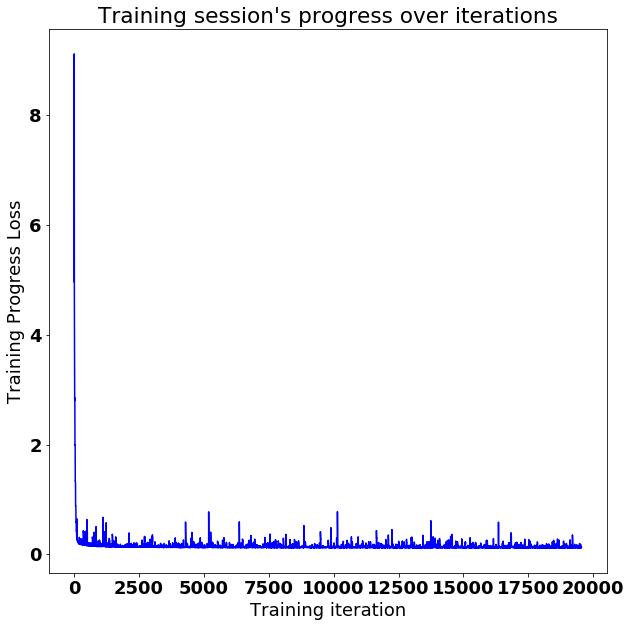

In [4085]:
width = 10
height = 10
plt.figure(figsize=(width, height))

plt.title("Training session's progress over iterations")
plt.plot(train_loss_hist, 'b-', label='Train Loss')
plt.plot(test_loss_hist, 'g--', label='Test Loss')
plt.xlabel('Training iteration')
plt.ylabel('Training Progress Loss')
plt.show()


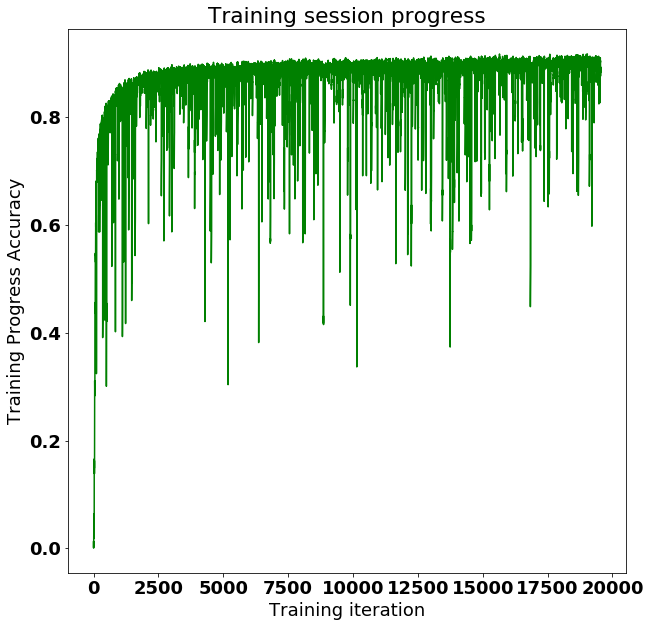

In [4086]:
#plotting accuracy

plt.figure(figsize=(width, height))
plt.plot(train_acc, 'g-', label='Train acc')
plt.plot(test_acc, 'g--', label='Test acc')
plt.title('Training session progress')
plt.xlabel('Training iteration')
plt.ylabel('Training Progress Accuracy')
plt.show()

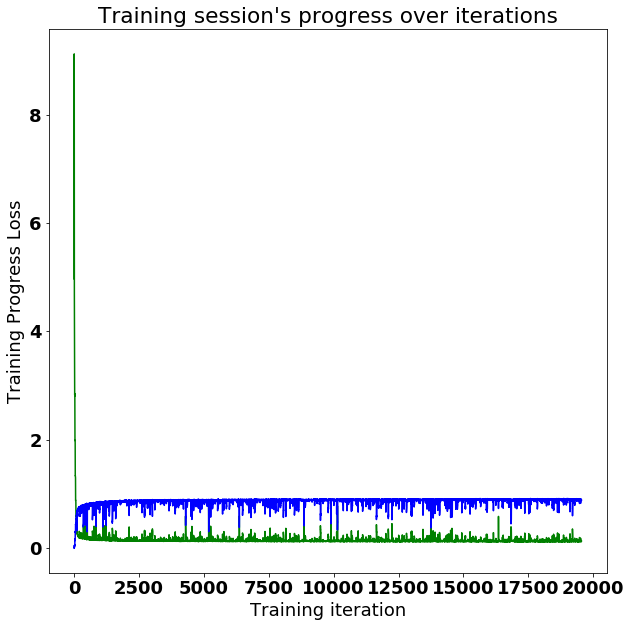

In [4087]:
font = {
    'family' : 'Bitstream Vera Sans',
    'weight' : 'bold',
    'size'   : 18
}
plt.rc('font', **font)

plt.figure(figsize=(width, height))

plt.title("Training session's progress over iterations")
plt.plot(train_loss_hist, 'g', label='Train Loss')
#plt.plot(test_loss_hist, '--', label='Test Loss')
plt.plot(train_acc, 'b', label='Train acc')
#plt.plot(test_acc, 'g-', label='Test acc')
plt.xlabel('Training iteration')
plt.ylabel('Training Progress Loss')
plt.show()

In [ ]:
for i in range(95):
    _, loss_test, _, acc_test,  = sess.run([optimizer, loss, softmax, accuracy], feed_dict={x: X_te,
                                                                                            y: Y_te
                                                                  })

In [ ]:
print("Test Accuracy %f and Loss %f "%(acc_test * 100, loss_test))

# Bidirectional LSTM/GRU

In [354]:
tf.reset_default_graph()
sess = tf.Session()

In [355]:
n_hidden = 256
n_input = X_tr.shape[2]
n_steps = X_tr.shape[1]
n_classes = Y_tr.shape[1]

batch_size = len(X_tr)//2
total_batches = X_tr.shape[0]//batch_size
epochs = 200000
learning_rate = 15e-4

x = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_input), name="x")
y = tf.placeholder(dtype=tf.float32, shape=(None, n_classes), name="y")

print(x)
print(y, batch_size, len(X_tr) - batch_size * total_batches)

Tensor("x:0", shape=(?, 12, 1), dtype=float32)
Tensor("y:0", shape=(?, 83), dtype=float32) 1255 1


In [356]:
def biRNN(x_):

    weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([2 * n_hidden, n_classes]))
     }
    biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
     }
    #x = tf.nn.relu(x)
    x = tf.unstack(x_,n_steps, 1)
    
    lstm_bw_cell = [tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0), output_keep_prob=1.0) for _ in range(2)]
    #lstm_bw_cell = tf.layers.batch_normalization(lstm_bw_cell)
    lstm_bw = tf.contrib.rnn.MultiRNNCell(lstm_bw_cell)
    
    lstm_fw_cell = [tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0), output_keep_prob=1.0) for _ in range(2)]
    #lstm_fw_cell = tf.layers.batch_normalization(lstm_fw_cell)
    lstm_fw = tf.contrib.rnn.MultiRNNCell(lstm_fw_cell)
    
    outputs, _, _ = tf.contrib.rnn.static_bidirectional_rnn(lstm_fw, lstm_bw, x, dtype=tf.float32)
    
    
    return tf.matmul(outputs[-1], weights['out']) + biases['out']
    

    

In [357]:
logits = biRNN(x)

In [358]:
softmax = tf.nn.softmax(logits, name="softmax")

In [359]:
reg = 0.0015
l2 = reg * np.sum(tf.nn.l2_loss(var) for var in tf.trainable_variables())
class_weights = tf.constant((weight_array), dtype=tf.float32)
class_weights, logits
step = tf.Variable(0, trainable=False)

In [360]:
#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)) + l2
loss = tf.reduce_mean((tf.nn.weighted_cross_entropy_with_logits(targets=y, logits=logits, 
                                                                pos_weight=class_weights)))+l2

In [361]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [362]:
correct_pred = tf.equal(tf.argmax(softmax, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [363]:
saver = tf.train.Saver()

In [364]:
init = tf.global_variables_initializer()
sess.run(init)

In [367]:
train_loss_hist = []
train_acc = []
test_loss_hist = []
test_acc = []
import time as t
tr_iter = 10000
#batch_size = 512
start = t.time()
length = len(X_tr)
m = 0
#index = bathc
#index_ = 0
try:
    for i in range(epochs):
        
        for j in range(total_batches):
            
            index = (j * batch_size) % (length - batch_size)    
            #index = np.random.choice(length, batch_size, replace=True)
            #index = 
            batch_xs = X_tr[index:index + batch_size]
            batch_ys = Y_tr[index:index + batch_size]
            
            #batch_xs = X_tr[index]
            #batch_ys = Y_tr[index]
            
            
            _, loss_, _, acc,  = sess.run([optimizer, loss, softmax, accuracy], feed_dict={x: batch_xs,
                                                                       y: batch_ys
                                                                  })
            #_loss, _, _acc,  = sess.run([ loss, softmax, accuracy], feed_dict={x: X_te,
                                                                   #y: Y_te
                                                                  #})
    
            
            if m % 101 == 0:
                #accu = roc_auc_score(Y_te, acc_train)
                print('Epoch {} batch {} train-loss: {} and accuracy {}%'.format(i, j, loss_, 100 * acc))
                #print('test-loss: {} and test accuracy {}%'.format( _loss, 100 * _acc))
                #test_acc.append(_acc)
                train_acc.append(acc)
                #test_loss_hist.append(_loss)
                train_loss_hist.append(loss_)
            m += 1
            #print(prediction)
except KeyboardInterrupt:
    print('Training Interrupted')
end = t.time()
print((end-start)/60, 'mins')

Epoch 0 batch 0 train-loss: 0.8379117846488953 and accuracy 9.003983438014984%
Epoch 50 batch 1 train-loss: 0.6004952788352966 and accuracy 21.9123512506485%
Epoch 101 batch 0 train-loss: 0.6332504749298096 and accuracy 13.784860074520111%
Epoch 151 batch 1 train-loss: 0.5723896026611328 and accuracy 21.43426239490509%
Epoch 202 batch 0 train-loss: 0.6256940364837646 and accuracy 13.227090239524841%
Epoch 252 batch 1 train-loss: 0.7133556008338928 and accuracy 14.422310888767242%
Epoch 303 batch 0 train-loss: 0.623296320438385 and accuracy 13.625498116016388%
Epoch 353 batch 1 train-loss: 0.6102997064590454 and accuracy 20.87649405002594%
Training Interrupted
0.46123714447021485 mins


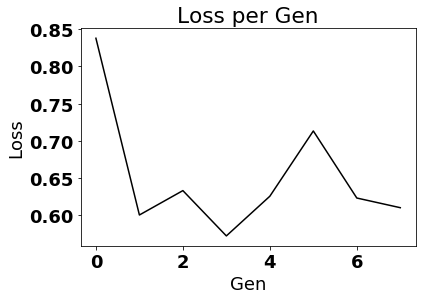

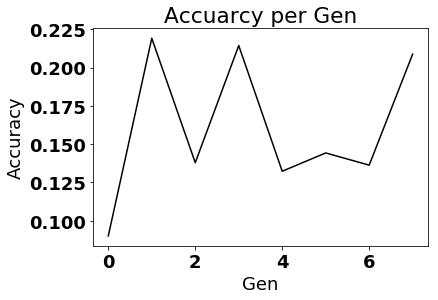

In [368]:
plt.plot(train_loss_hist, 'k-', label='Train Loss')
plt.plot(test_loss_hist, 'r--', label='Test Loss')
plt.title('Loss per Gen')
plt.xlabel('Gen')
plt.ylabel('Loss')
plt.show()


#plotting accuracy
plt.plot(train_acc, 'k-', label='Train acc')
plt.plot(test_acc, 'r--', label='Test acc')
plt.title('Accuarcy per Gen')
plt.xlabel('Gen')
plt.ylabel('Accuracy')
plt.show()

# Dynamic GRU

In [191]:
tf.reset_default_graph()
sess1 = tf.Session()

In [192]:
n_inputs = X.shape[1]
n_classes = Y_.shape[1]
x = tf.placeholder("float", [None, n_steps, n_inputs//n_steps])
y = tf.placeholder("float", [None, n_classes ])
n_layers = 4
alpha = 0.5
batch_size = 5000
epochs = 300
n_neurons =1024
total_batches = X_tr.shape[0]//batch_size
n_hidden = 1000
learning_rate = 15e-4
print(x, y, X_tr.shape,total_batches, batch_size)

Tensor("Placeholder:0", shape=(?, 9, 1), dtype=float32) Tensor("Placeholder_1:0", shape=(?, 159), dtype=float32) (8580, 9, 1) 1 5000


In [193]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.0, shape = shape)
    return tf.Variable(initial)

def lstm_cell():
    return tf.contrib.rnn.BasicLSTMCell(n_hidden)


def GRU(x, neurons):
    #cell = [tf.contrib.rnn.GRUCell(neurons) for _ in range(2)]
    cell = tf.contrib.rnn.GRUCell(neurons)
    cell = tf.contrib.rnn.DropoutWrapper(cell, 0.8)
    #cell_ = tf.contrib.rnn.MultiRNNCell(cell)
    _, final_state = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)
    logits = tf.contrib.layers.fully_connected(final_state, n_classes, activation_fn=None)
    
    return logits
    

In [194]:

logits = GRU(x, n_neurons)
softmax = tf.nn.softmax(logits)   
logits

<tf.Tensor 'fully_connected/BiasAdd:0' shape=(?, 159) dtype=float32>

In [195]:
#weights_tf = tf.constant(weight_array, dtype=tf.float32)
#weights_tf

In [196]:

#weight_freq = np.array(weights/n)
#value = int(n/m)
class_weights = tf.constant((weight_array), dtype=tf.float32)
class_weights, logits


(<tf.Tensor 'Const:0' shape=(159,) dtype=float32>,
 <tf.Tensor 'fully_connected/BiasAdd:0' shape=(?, 159) dtype=float32>)

In [197]:
weight_freq.shape

(10726, 1)

In [198]:


#cross_entropy_ = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
cross_entropy_ = tf.reduce_mean((tf.nn.weighted_cross_entropy_with_logits(targets=y,logits=logits, pos_weight=class_weights))) 
                                                                        
#cross_entropy_ = tf.reduce_mean(tf.multiply(cross_entropy, class_weights))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cross_entropy_)

prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))


In [199]:
init1 = tf.global_variables_initializer()
sess1.run(init1)

In [200]:
train_loss_hist = []
train_acc = []
test_loss_hist = []
test_acc = []
import time as t
epochs = 10000
start = t.time()
m = 0

try:
    for i in range(epochs):
        for j in range(total_batches):
            index = (j * batch_size) % (length - batch_size)    
            #index = np.random.choice(length, batch_size, replace=True)
            #index = 
            batch_xs = X_tr[index:index + batch_size]
            batch_ys = Y_tr[index:index + batch_size]
          
            
            _, loss_, acc = sess1.run([optimizer, cross_entropy_, accuracy], feed_dict={x: batch_xs,
                                                                                       y: batch_ys})
  
            #loss_te, acc_te = sess1.run([cross_entropy_, accuracy], feed_dict={x: X_te,
                                                                              #y: Y_te})
           
    

            if m % 101 == 0:
                #print('Batch {} train-loss: {} train-accuracy: {}  test loss: {} test accuracy: {}'.format(i, loss_))
                print('Epoch {} batch {} train-loss: {} accuracy {}%'.format(i, j, loss_,acc * 100))
                #print('testing-loss: {} test accuracy {}%'.format(loss_te,acc_te * 100))
                #test_acc.append(acc_te)
                train_acc.append(acc)
                #test_loss_hist.append(loss_te)
                train_loss_hist.append(loss_)
                #print(prediction)
            m += 1    
except KeyboardInterrupt:
    print('Training Interrupted')
end = t.time()
print((end-start)/60)

Epoch 0 batch 0 train-loss: 1.5027577877044678 accuracy 0.11999999405816197%
Epoch 101 batch 0 train-loss: 0.9491323828697205 accuracy 0.4600000102072954%
Epoch 202 batch 0 train-loss: 0.7385324239730835 accuracy 1.3199998065829277%
Epoch 303 batch 0 train-loss: 0.5744832754135132 accuracy 2.8199996799230576%
Epoch 404 batch 0 train-loss: 0.4503779411315918 accuracy 5.279999598860741%
Epoch 505 batch 0 train-loss: 0.6231657266616821 accuracy 2.8999999165534973%
Epoch 606 batch 0 train-loss: 0.4096278250217438 accuracy 6.89999982714653%
Epoch 707 batch 0 train-loss: 0.3481336832046509 accuracy 8.659999817609787%
Epoch 808 batch 0 train-loss: 0.3121899366378784 accuracy 11.419999599456787%
Epoch 909 batch 0 train-loss: 0.28844431042671204 accuracy 13.579998910427094%
Epoch 1010 batch 0 train-loss: 0.4060010612010956 accuracy 6.379999965429306%
Epoch 1111 batch 0 train-loss: 0.3057194948196411 accuracy 10.659998655319214%
Epoch 1212 batch 0 train-loss: 0.25793328881263733 accuracy 15.7999

# Graph

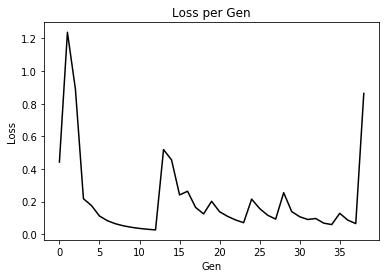

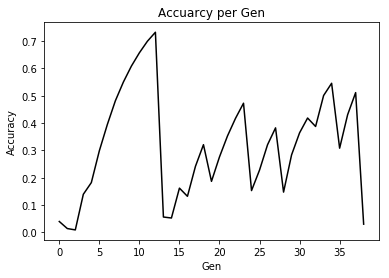

In [3444]:
plt.plot(train_loss_hist, 'k-', label='Train Loss')
plt.plot(test_loss_hist, 'r--', label='Test Loss')
plt.title('Loss per Gen')
plt.xlabel('Gen')
plt.ylabel('Loss')
plt.show()


#plotting accuracy
plt.plot(train_acc, 'k-', label='Train acc')
plt.plot(test_acc, 'r--', label='Test acc')
plt.title('Accuarcy per Gen')
plt.xlabel('Gen')
plt.ylabel('Accuracy')
plt.show()

# GRU Dynamic

In [70]:
tf.reset_default_graph()
sess = tf.Session() 

In [71]:
n_inputs = X.shape[1]
n_classes = Y_.shape[1]
x = tf.placeholder("float", [None, n_steps, n_inputs//n_steps])
y = tf.placeholder("float", [None, n_classes])
batch_size =len(X_tr)//n_steps
epochs = 30000
n_neurons = 256
total_batches = X_tr.shape[0]//batch_size

learning_rate = 1e-4
print(x, y, X_tr.shape,total_batches)

Tensor("Placeholder:0", shape=(?, 9, 1), dtype=float32) Tensor("Placeholder_1:0", shape=(?, 159), dtype=float32) (8580, 9, 1) 9


In [72]:
def biGRU(x, n_neurons):
    cells = tf.contrib.rnn.GRUCell(n_neurons)
    cells = tf.contrib.rnn.DropoutWrapper(cells, 0.75)
    #cells = tf.layers.batch_normalization(cells)
    #ells = tf.contrib.rnn.MultiRNNCell(cells)
    
    output, final = tf.nn.dynamic_rnn(cells, x, dtype=tf.float32)
    #last = output[-1]
    logit = tf.contrib.layers.fully_connected(final, n_classes, activation_fn=tf.nn.relu)
    return logit
    
    

In [73]:
logits = biGRU(x, n_neurons)
softmax = tf.nn.softmax(logits)


In [74]:
class_weights = tf.constant((weight_array), dtype=tf.float32)
class_weights, logits
step = tf.Variable(0, trainable=False)
#cross_entropy_ = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
cross_entropy = tf.reduce_mean((tf.nn.weighted_cross_entropy_with_logits(targets=y, logits=logits, pos_weight=class_weights)))
#cross_entropy_ = tf.reduce_mean(tf.multiply(cross_entropy, class_weights))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-6).minimize(cross_entropy
                                                                                          ,global_step=step)

prediction = tf.equal(tf.argmax(softmax, 1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [75]:
init = tf.global_variables_initializer()
sess.run(init)

In [77]:
train_loss_hist = []
train_acc = []
test_loss_hist = []
test_acc = []
import time as t
epochs = 10000
start = t.time()
m = 0

try:
    for i in range(epochs):
        for j in range(total_batches):
            index = (j * batch_size) % (length - batch_size)    
            #index = np.random.choice(length, batch_size, replace=True)
            #index = 
            batch_xs = X_tr[index:index + batch_size]
            batch_ys = Y_tr[index:index + batch_size]
          
            
            _, _, loss_, acc, = sess.run([softmax, optimizer, cross_entropy, accuracy], feed_dict={x: batch_xs,
                                                                              y: batch_ys})
  
            #_, loss_te, acc_te = sess.run([softmax, cross_entropy, accuracy], feed_dict={x: X_te,
                                                                     #y: Y_te})
           
    

            if m % 181 == 0:
                #print('Batch {} train-loss: {} train-accuracy: {}  test loss: {} test accuracy: {}'.format(i, loss_))
                print('Epoch {} batch {} with TRAIN-loss:   {} accuracy      {}%'.format(i, j, loss_,acc * 100))
                #print('           TESTING-loss: {} test accuracy  {}%'.format(loss_te,acc_te * 100))
                #test_acc.append(acc_te)
                train_acc.append(acc)
                #test_loss_hist.append(loss_te)
                train_loss_hist.append(loss_)
                #print(prediction)
            m += 1    
except KeyboardInterrupt:
    print('Training Interrupted')
end = t.time()
print('Time of training: {} mins'.format((end-start)/60))

Epoch 0 batch 0 with TRAIN-loss:   2.3417348861694336 accuracy      6.19097538292408%
Epoch 20 batch 1 with TRAIN-loss:   1.403347373008728 accuracy      5.036725848913193%
Epoch 40 batch 2 with TRAIN-loss:   1.3191176652908325 accuracy      5.351521074771881%
Epoch 60 batch 3 with TRAIN-loss:   1.0772343873977661 accuracy      5.141657963395119%
Epoch 80 batch 4 with TRAIN-loss:   1.2492601871490479 accuracy      2.7282264083623886%
Epoch 100 batch 5 with TRAIN-loss:   1.1425210237503052 accuracy      1.993703842163086%
Epoch 120 batch 6 with TRAIN-loss:   1.2056701183319092 accuracy      0.6295907311141491%
Epoch 140 batch 7 with TRAIN-loss:   1.2021353244781494 accuracy      1.9937040284276009%
Epoch 160 batch 8 with TRAIN-loss:   0.9575526714324951 accuracy      2.7282264083623886%
Epoch 181 batch 0 with TRAIN-loss:   2.199650287628174 accuracy      1.0493178851902485%
Epoch 201 batch 1 with TRAIN-loss:   1.391792893409729 accuracy      0.8394543081521988%
Epoch 221 batch 2 with TR

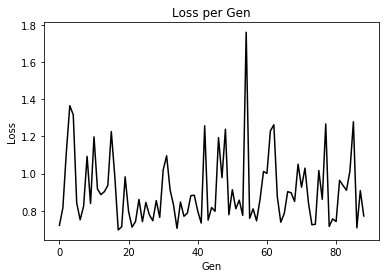

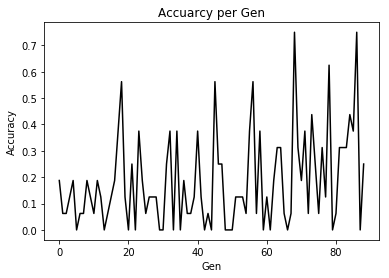

In [784]:
plt.plot(train_loss_hist, 'k-', label='Train Loss')
plt.plot(test_loss_hist, 'r--', label='Test Loss')
plt.title('Loss per Gen')
plt.xlabel('Gen')
plt.ylabel('Loss')
plt.show()


#plotting accuracy
plt.plot(train_acc, 'k-', label='Train acc')
plt.plot(test_acc, 'r--', label='Test acc')
plt.title('Accuarcy per Gen')
plt.xlabel('Gen')
plt.ylabel('Accuracy')
plt.show()

In [232]:
print(np.mean(train_acc[20:]))

0.499425


# GRU Bidirectional

In [1693]:
tf.reset_default_graph()
sess = tf.Session()

In [1694]:
n_inputs = X.shape[1]
n_classes = Y_.shape[1]
x = tf.placeholder("float", [None, n_steps, n_inputs/n_steps], name='x')
y = tf.placeholder("float", [None, n_classes], name='y')
y_steps = tf.placeholder("float", [None, n_classes], name='y_steps')

batch_size =5000
epochs = 3000000
n_neurons = 4500
total_batches = X_tr.shape[0]//batch_size

n_layers = 4
learning_rate = 1e-4
print(x, y, X_tr.shape,total_batches)

Tensor("x:0", shape=(?, 9, 1), dtype=float32) Tensor("y:0", shape=(?, 47), dtype=float32) (18019, 9, 1) 3


In [1695]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.0, shape = shape)
    return tf.Variable(initial)

def lstm_cell():
    return tf.contrib.rnn.BasicLSTMCell(n_hidden)


def LSTM(x, weight, bias, n_cells):
    #tf.name_scope('stack_lstm', reuse = True):
    stack_lstm = tf.contrib.rnn.MultiRNNCell([lstm_cell() for _ in range(n_cells)])
    output, state = tf.nn.dynamic_rnn(stack_lstm, x, dtype = tf.float32)
    output_flattened = tf.reshape(output, [-1, n_hidden])
    output_logits = tf.add(tf.matmul(output_flattened,weight),bias)
    output_all = tf.nn.relu(output_logits)
    output_reshaped = tf.reshape(output_all,[-1,n_steps,n_classes])
    output_last = tf.gather(tf.transpose(output_reshaped,[1,0,2]), n_steps - 1)  
    #output = tf.transpose(output, [1, 0, 2])
    #last = tf.gather(output, int(output.get_shape()[0]) - 1)
    #output_last = tf.nn.sigmoid(tf.matmul(last, weight) + bias)
    return output_last, output_all
    

In [1696]:
n_cells = 3
class_weights = tf.constant((weight_array), dtype=tf.float32)
weight = weight_variable([n_hidden,n_classes])
bias = bias_variable([n_classes])
logits, y_all = LSTM(x,weight,bias, n_cells)
    

In [1697]:
all_steps_cost = -tf.reduce_mean((y_steps * tf.log(y_all))  + (1 - y_steps) * tf.log(1 - y_all))


In [1698]:
softmax = tf.nn.softmax(logits)


loss = tf.reduce_mean((tf.nn.weighted_cross_entropy_with_logits(targets=y, 
                                                                logits=logits, pos_weight=class_weights, 
                                                                name='weighted_cross_entropy')), 
                                                                name='loss')+all_steps_cost
#cross_entropy_ = tf.reduce_mean(tf.multiply(cross_entropy, class_weights))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

pred = tf.equal(tf.argmax(y, 1), tf.argmax(softmax, 1))
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))



/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [1699]:
sess = tf.Session()
init = tf.global_variables_initializer()

In [1700]:
train_loss_hist = []
train_acc = []
test_loss_hist = []
test_acc = []
import time as t
epochs = 10000
start = t.time()
m = 0

try:
    for i in range(epochs):
        for j in range(total_batches):
            index = (j * batch_size) % (length - batch_size)    
            #index = np.random.choice(length, batch_size, replace=True)
            #index = 
            batch_xs = X_tr[index:index + batch_size]
            batch_ys = Y_tr[index:index + batch_size]
            batch_y_steps = np.tile(batch_ys,((X_tr.shape[1]),1))
            
            _, _, loss_, acc, = sess.run([softmax, optimizer, loss, accuracy], feed_dict={x: batch_xs,
                                                                              y: batch_ys,
                                                                              y_steps: batch_y_steps})
  
            #_, loss_te, acc_te = sess.run([softmax, cross_entropy, accuracy], feed_dict={x: X_te,
                                                                     #y: Y_te})
           
    

            if m % 121 == 0:
                #print('Batch {} train-loss: {} train-accuracy: {}  test loss: {} test accuracy: {}'.format(i, loss_))
                print('Epoch {} batch {} with TRAIN-loss:   {} accuracy      {}%'.format(i, j, loss_,acc * 100))
                #print('           TESTING-loss: {} test accuracy  {}%'.format(loss_te,acc_te * 100))
                #test_acc.append(acc_te)
                train_acc.append(acc)
                #test_loss_hist.append(loss_te)
                train_loss_hist.append(loss_)
                #print(prediction)
            m += 1    
except KeyboardInterrupt:
    print('Training Interrupted')
end = t.time()
print('Time of training: {} mins'.format((end-start)/60))

FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[Node: Variable/read = Identity[T=DT_FLOAT, _class=["loc:@Variable"], _device="/job:localhost/replica:0/task:0/gpu:0"](Variable)]]
	 [[Node: Mean_1/_31 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_2121_Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Variable/read', defined at:
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1696-6cd4742323cf>", line 3, in <module>
    weight = weight_variable([n_hidden,n_classes])
  File "<ipython-input-1695-3b30d4901b58>", line 3, in weight_variable
    return tf.Variable(initial)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 200, in __init__
    expected_shape=expected_shape)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 319, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1303, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable
	 [[Node: Variable/read = Identity[T=DT_FLOAT, _class=["loc:@Variable"], _device="/job:localhost/replica:0/task:0/gpu:0"](Variable)]]
	 [[Node: Mean_1/_31 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_2121_Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [167]:
l = len(X)
div = l//20
div2 = div*2


#train_indices = np.random.choice(l, round(0.9*l), replace=False)
#test_indices = np.array(list(set(range(l)) - set(train_indices)))


train_indices = int(l * 0.9)
test_indices = train_indices + int((l - train_indices)/2)
#val_indices_ = l - train_indices - test_indices
#val_indices = np.array(list(test_indices))


#print(len(test_indices), len(train_indices) )
#Dividing data for testing, validation and training
X_te, Y_te = X[train_indices:test_indices], Y_[train_indices:test_indices]
X_val, Y_val = X[test_indices:], Y_[test_indices:]
X_tr, Y_tr = X[:train_indices], Y_[:train_indices]

#data info
print('X shape and Y shape                       {}, {}'.format(X.shape, Y_.shape))
print('X testing shape and Y testing shape       {}, {}'.format(X_te.shape, Y_te.shape))
print('X training shape and Y training shape     {}, {}'.format(X_tr.shape, Y_tr.shape))
print('X validation shape and Y validation shape {}, {}'.format(X_val.shape, Y_val.shape))

X shape and Y shape                       (8438, 9), (8438, 56)
X testing shape and Y testing shape       (422, 9), (422, 56)
X training shape and Y training shape     (7594, 9), (7594, 56)
X validation shape and Y validation shape (422, 9), (422, 56)


# Classification 

In [237]:
tf.reset_default_graph()
sess = tf.Session()

batch_size = len(X_tr)
n_inputs = len(X_tr[0])
n_classes = new_id - 1
#n_labels = int(labels[-1])
learning_rate = 0.002
dropout = 0.5
reg = 0.0005

x = tf.placeholder(dtype=tf.float32, shape=(None, n_inputs), name='Inputs')
y = tf.placeholder(dtype=tf.float32, shape=(None, n_classes), name='outputs')
seed = 3
np.random.seed(seed)
tf.set_random_seed(seed)
print(n_inputs, n_classes)

9 56


In [238]:
def init_variable(shape):
    return tf.Variable(tf.random_normal(shape=shape, mean=0, stddev=(0.1)))

def logistic(input_layer, weight, bias, dropout, activ=True):
    layer_out = tf.add(tf.matmul(input_layer, weight), bias)
    
    if dropout>0:
        if activ:
            return (tf.nn.dropout(tf.nn.sigmoid(layer_out), dropout))
        else:
            return tf.nn.dropout(layer_out, dropout)
    else:
        if not activ:
            return layer_out
        else:
            return (tf.nn.sigmoid(layer_out))
    
 

In [247]:

# First layer

n_init_neurons = 1024


W_1 = init_variable(shape=[n_inputs, 512])
b_1 = init_variable(shape=[512])
h_1 = logistic(x, W_1, b_1, dropout=-0.75)
h_1 = tf.layers.batch_normalization(h_1)

# Second layer
W_2 = init_variable(shape=[512, 256])
b_2 = init_variable(shape=[256])
h_2 = logistic(h_1, W_2, b_2, dropout=-0.75)
h_2 = tf.layers.batch_normalization(h_2)

# Third layer
W_3 = init_variable(shape=[256,128])
b_3 = init_variable(shape=[128])
h_3 = logistic(h_2, W_3, b_3, dropout=-0.5)
h_3 = tf.layers.batch_normalization(h_3)


W_4 = init_variable(shape=[128, n_classes])
b_4 = init_variable(shape=[n_classes])
h_4 = logistic(h_3, W_4, b_4, dropout=-0.5, activ=False)
#h_4 = tf.layers.batch_normalization(h_4)


logits = h_4# tf.nn.softmax(h_4)



class_weights = tf.constant((weight_array), dtype=tf.float32)
class_weights, logits
step = tf.Variable(0, trainable=False)


#output_ = tf.argmax(output, axis=1)
#loss = tf.reduce_mean(tf.abs(y - output))
#loss = tf.reduce_sum(tf.pow(y - output, 2))/(batch_size)
#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y ))
loss = tf.reduce_mean((tf.nn.weighted_cross_entropy_with_logits(targets=y, logits=h_4, 
                                                                pos_weight=class_weights)))

#loss = -tf.reduce_mean( y * tf.log(logits) + (1-y)*tf.log(1 - logits))
#loss += (tf.nn.l2_loss(W_1) + tf.nn.l2_loss(W_2) + tf.nn.l2_loss(W_3)+ tf.nn.l2_loss(W_4))* reg 

train_step = tf.train.GradientDescentOptimizer(learning_rate=0.008).minimize(loss)
#prediction = tf.round(tf.nn.softmax(loss_1))

#prediction
#prediction = tf.round((output))
prediction = tf.equal(tf.argmax(logits,1), tf.argmax(y, 1))
#pred = tf.cast(tf.equal(prediction ,y), dtype= tf.int32)
acc = tf.reduce_mean(tf.cast(prediction,tf.float32))

#print(output)




In [248]:
init = tf.global_variables_initializer()
sess.run(init)


In [249]:
train_loss_hist = []
train_acc = []
test_loss_hist = []
test_acc = []
import time as t
tr_iter = 300000
start = t.time()

try:
    for i in range(tr_iter):
        index = np.random.choice(len(X_tr)-1, batch_size, replace=True)
        batch_xs = X_tr
        batch_ys = Y_tr
        sess.run(train_step, feed_dict={x: batch_xs,
                                        y: batch_ys})
        _, loss_, acc_train= sess.run([train_step, loss, acc], feed_dict={x: batch_xs,
                                          y: batch_ys})


        if (i) % 10 == 0:
            print('Batch {} train-loss: {} train-accuracy: {}'.format(i, loss_, acc_train * 100))
            
            #test_acc.append(acc_test)
            train_acc.append(acc_train)
            #test_loss_hist.append(loss_test)
            train_loss_hist.append(loss_)
            #print(prediction)
except KeyboardInterrupt:
    print('Training Interrupted')
end = t.time()
print((end-start)/60)



Batch 0 train-loss: 1.4597816467285156 train-accuracy: 0.026336582959629595
Batch 10 train-loss: 1.4494320154190063 train-accuracy: 0.026336582959629595
Batch 20 train-loss: 1.4402753114700317 train-accuracy: 0.026336582959629595
Batch 30 train-loss: 1.4321702718734741 train-accuracy: 0.026336582959629595
Batch 40 train-loss: 1.4249913692474365 train-accuracy: 0.026336582959629595
Batch 50 train-loss: 1.418628454208374 train-accuracy: 0.026336582959629595
Batch 60 train-loss: 1.4129862785339355 train-accuracy: 0.026336582959629595
Batch 70 train-loss: 1.407979965209961 train-accuracy: 0.026336582959629595
Batch 80 train-loss: 1.403535008430481 train-accuracy: 0.026336582959629595
Batch 90 train-loss: 1.399585485458374 train-accuracy: 0.026336582959629595
Batch 100 train-loss: 1.3960739374160767 train-accuracy: 0.026336582959629595
Batch 110 train-loss: 1.3929498195648193 train-accuracy: 0.026336582959629595
Batch 120 train-loss: 1.3901681900024414 train-accuracy: 0.026336582959629595
B

Batch 1080 train-loss: 1.3635938167572021 train-accuracy: 24.058467149734497
Batch 1090 train-loss: 1.363577127456665 train-accuracy: 24.058467149734497
Batch 1100 train-loss: 1.363560676574707 train-accuracy: 24.058468639850616
Batch 1110 train-loss: 1.3635437488555908 train-accuracy: 24.058470129966736
Batch 1120 train-loss: 1.3635280132293701 train-accuracy: 24.058468639850616
Batch 1130 train-loss: 1.3635119199752808 train-accuracy: 24.058467149734497
Batch 1140 train-loss: 1.3634964227676392 train-accuracy: 24.058468639850616
Batch 1150 train-loss: 1.3634809255599976 train-accuracy: 24.058470129966736
Batch 1160 train-loss: 1.3634657859802246 train-accuracy: 24.058468639850616
Batch 1170 train-loss: 1.3634510040283203 train-accuracy: 24.058468639850616
Batch 1180 train-loss: 1.363436222076416 train-accuracy: 24.058467149734497
Batch 1190 train-loss: 1.3634217977523804 train-accuracy: 24.058467149734497
Batch 1200 train-loss: 1.3634079694747925 train-accuracy: 24.058468639850616
Ba

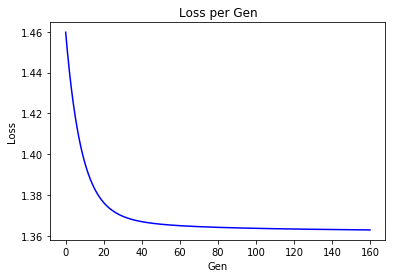

In [250]:
plt.title("Training session's progress over iterations")
plt.plot(train_loss_hist, 'b-', label='Train Loss')
plt.plot(test_loss_hist, 'g--', label='Test Loss')
plt.title('Loss per Gen')
plt.xlabel('Gen')
plt.ylabel('Loss')
plt.show()


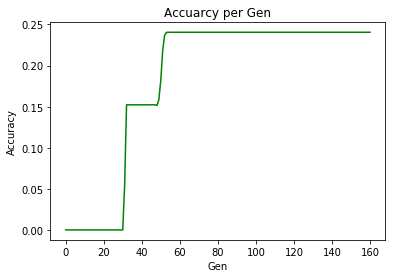

In [251]:
#plotting accuracy
plt.plot(train_acc, 'g-', label='Train acc')
plt.plot(test_acc, 'g--', label='Test acc')
plt.title('Accuarcy per Gen')
plt.xlabel('Gen')
plt.ylabel('Accuracy')
plt.show()